In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sbn
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_learning_curves
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
from sklearn.model_selection import validation_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from numpy import where
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [261]:
# loading data

df= pd.read_csv('/home/jpozoc/barracuda/jpozoc/Master HMDA/Machine Learning/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [262]:
df.shape

(400, 26)

In [263]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [264]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [265]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [266]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

### As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count' are object type. We need to change them to numerical dtype.


In [268]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [269]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [270]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [271]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



### There is some ambiguity present in the columns we have to remove that.

In [272]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [273]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [274]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



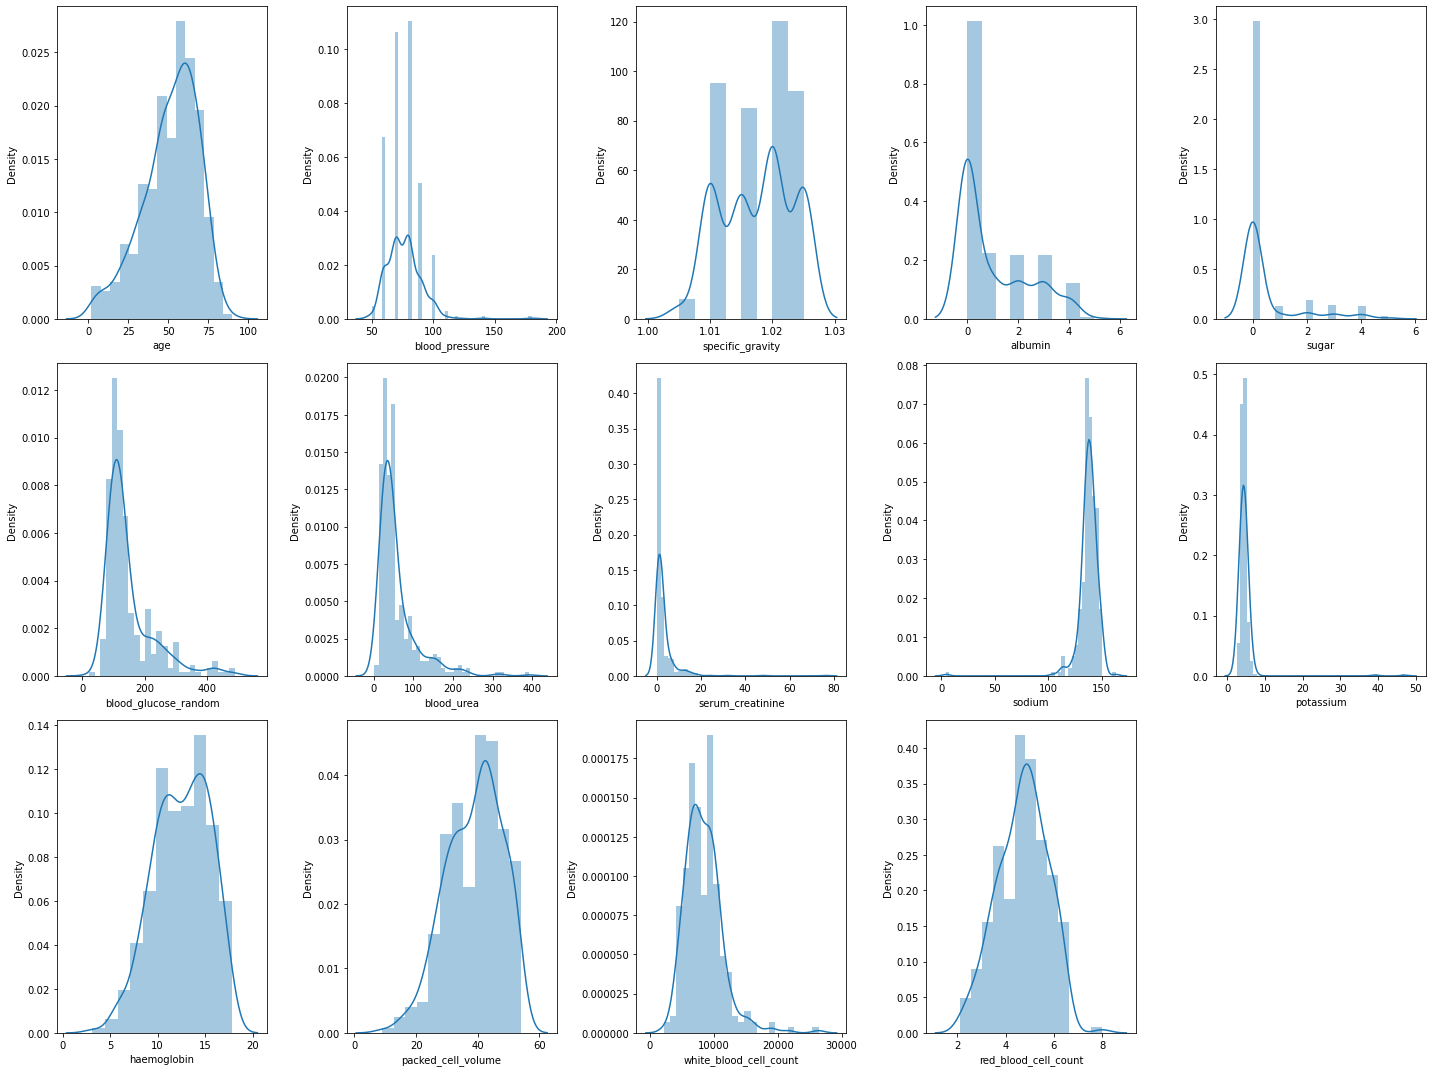

In [275]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

### Skewness is present in some of the columns.


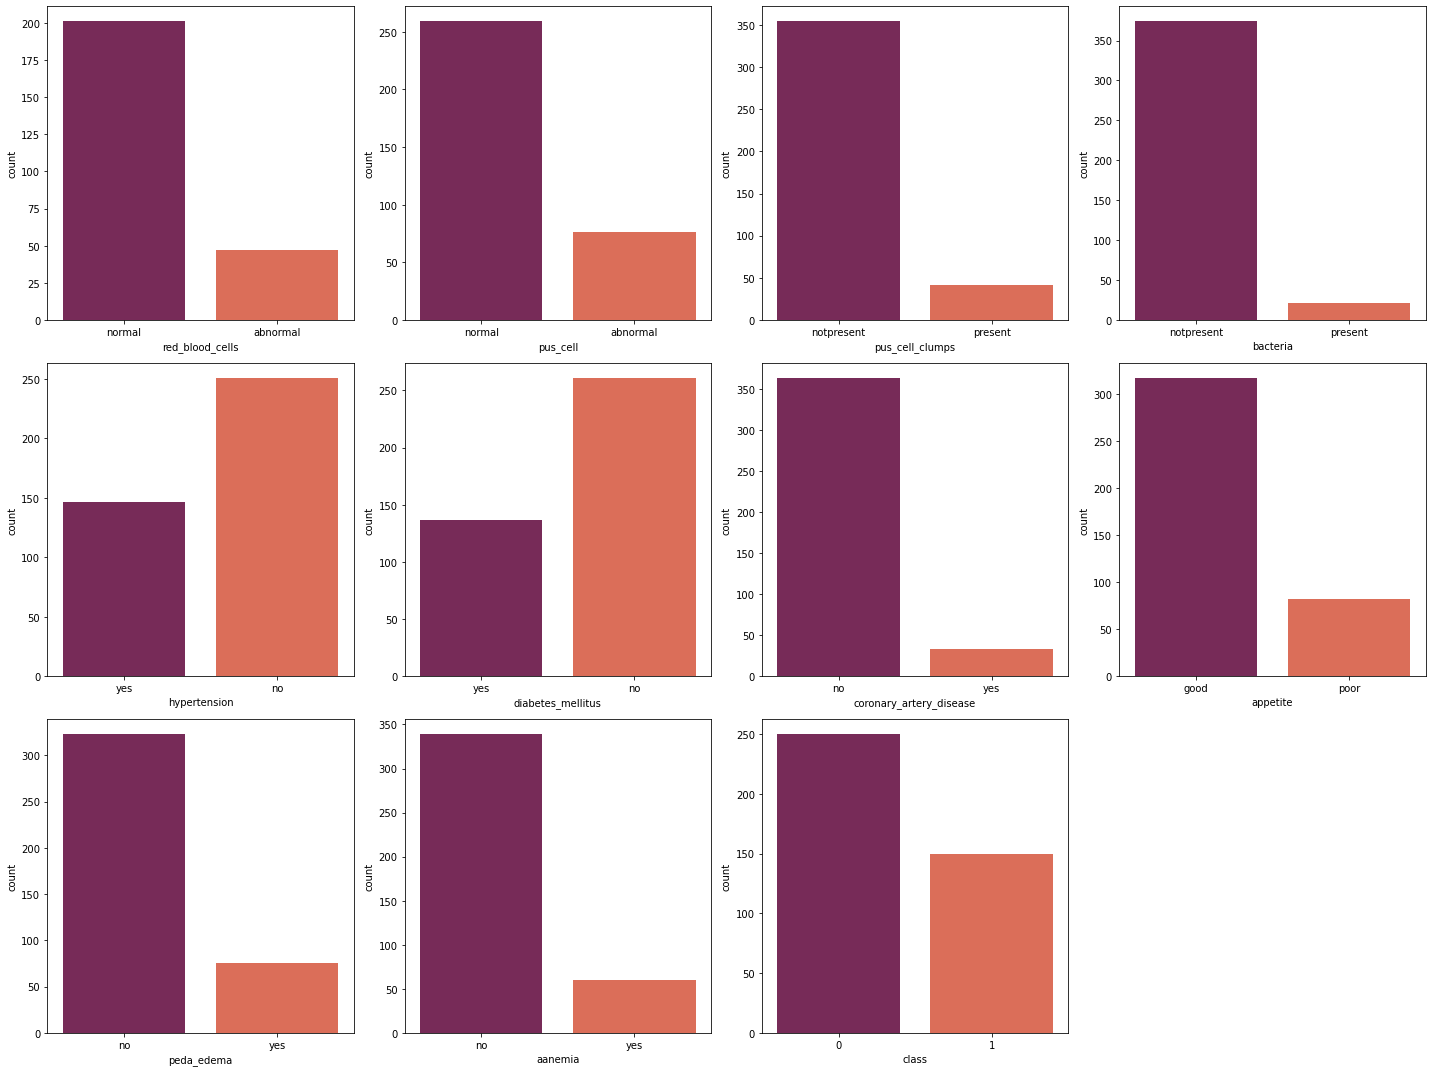

In [276]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

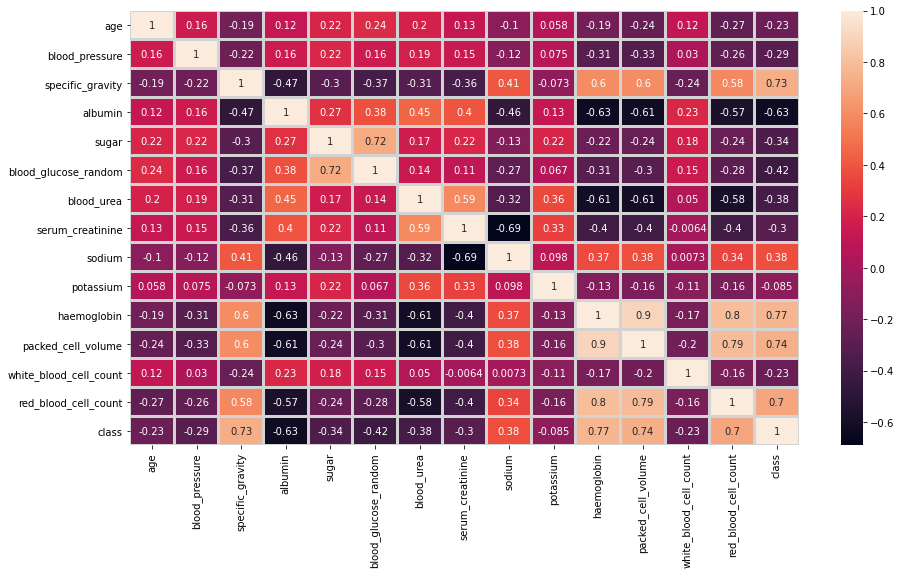

In [277]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.savefig('corr.png')
plt.show()

In [278]:


df.columns



Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

# Data Preprocessing

In [279]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [280]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [281]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [282]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [283]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [284]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [285]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [286]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

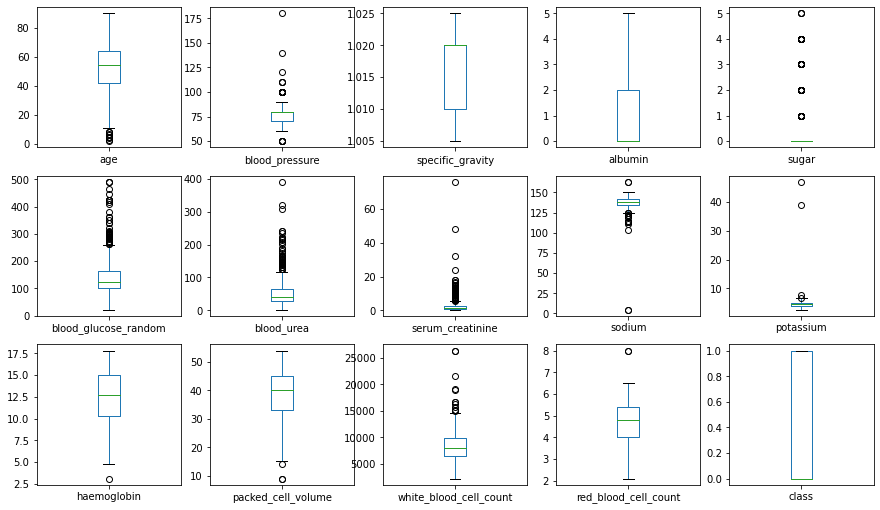

In [287]:
df.plot(kind='box',subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(15,15))
plt.show()

# Feature Encoding

In [288]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



### As all of the categorical columns have 2 categories we can use label encoder


In [289]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [290]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,92.0,...,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


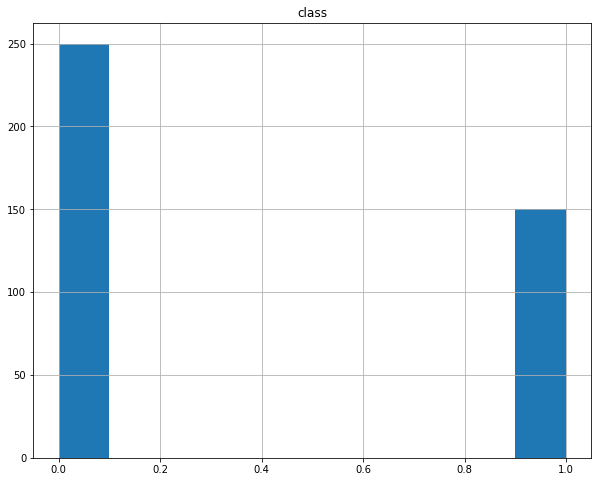

In [291]:
df.hist('class')
plt.savefig('hist_class.png')

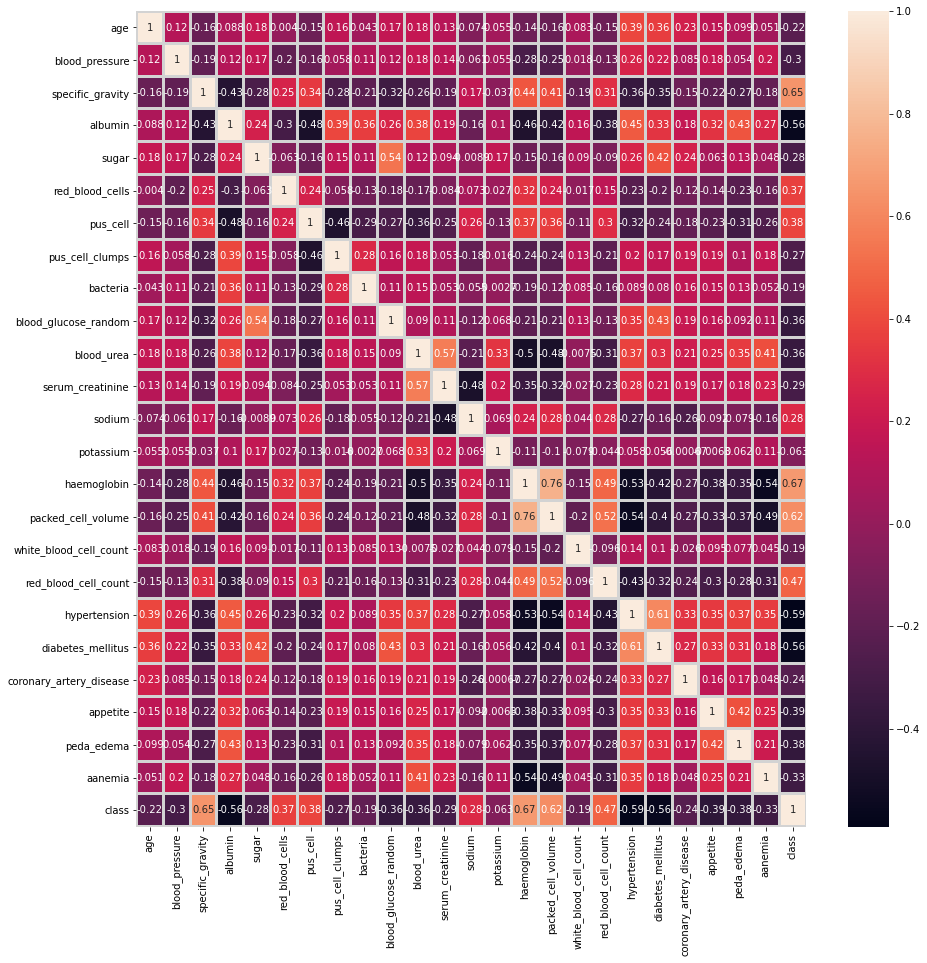

In [293]:
# heatmap of data

plt.figure(figsize = (15, 15))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.savefig('corr.png')
plt.show()

# 1. Analysis with all original variables

## a) KNN

In [138]:
df['class'].value_counts()

0    250
1    150
Name: class, dtype: int64

In [139]:
# Obtenemos X e Y
X = df.drop(['class'], axis = 1)
Y = df['class']
print(X.shape)
print(Y.shape)

(400, 24)
(400,)


In [140]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [141]:
# Normalizing data
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print(X_train_norm.shape)
print(X_test_norm.shape)

(280, 24)
(120, 24)


Score [0.91489362 0.96774194 0.96774194]
Score [0.91489362 0.94623656 0.92473118]
Score [0.89361702 0.92473118 0.89247312]
Score [0.88297872 0.89247312 0.90322581]
Score [0.87234043 0.87096774 0.90322581]
Score [0.87234043 0.84946237 0.90322581]
Score [0.86170213 0.84946237 0.90322581]
Score [0.85106383 0.84946237 0.88172043]
Score [0.85106383 0.86021505 0.88172043]
Score [0.81914894 0.86021505 0.88172043]
Score [0.81914894 0.84946237 0.88172043]
Score [0.80851064 0.84946237 0.86021505]
Score [0.80851064 0.84946237 0.86021505]
Score [0.79787234 0.83870968 0.84946237]
Score [0.79787234 0.83870968 0.84946237]
Score [0.79787234 0.82795699 0.83870968]
Score [0.79787234 0.8172043  0.83870968]
Score [0.79787234 0.8172043  0.83870968]
Score [0.79787234 0.77419355 0.82795699]
Score [0.76595745 0.77419355 0.8172043 ]
Score [0.75531915 0.77419355 0.8172043 ]
Score [0.74468085 0.78494624 0.8172043 ]
Score [0.74468085 0.77419355 0.8172043 ]
Score [0.74468085 0.77419355 0.80645161]
Score [0.7446808

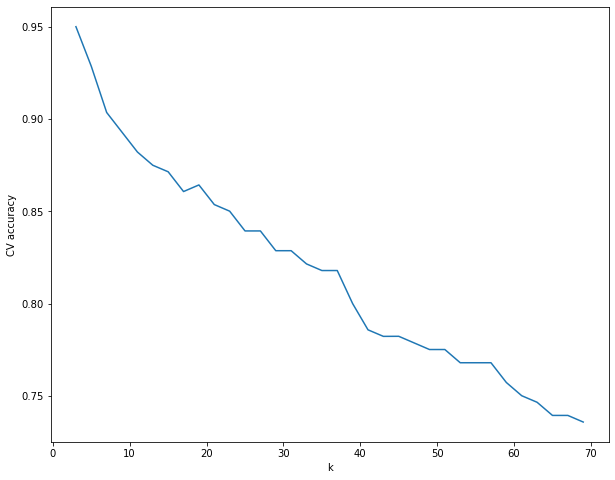

3


In [142]:
k_values = range(3,71,2)
cv_k_scores=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(kNN, X_train_norm, Y_train, cv=3, scoring='accuracy')
    print('Score',scores)
    cv_k_scores.append(scores.mean())
    
plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.show()

# Seleccionamos el máximo valor porque estamso considerando entropía
print(np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

In [143]:
kNN=KNeighborsClassifier(n_neighbors=np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])
kNN.fit(X_train_norm,Y_train) 

KNeighborsClassifier(n_neighbors=3)

In [144]:
knn_acc = accuracy_score(Y_test, kNN.predict(X_test_norm))

print(f"Training Accuracy of KNN is {accuracy_score(Y_train, kNN.predict(X_train_norm))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, kNN.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, kNN.predict(X_test_norm))}")

Training Accuracy of KNN is 0.9678571428571429
Test Accuracy of KNN is 0.95 

Confusion Matrix :- 
[[74  4]
 [ 2 40]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        78
           1       0.91      0.95      0.93        42

    accuracy                           0.95       120
   macro avg       0.94      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



[[74  4]
 [ 2 40]]


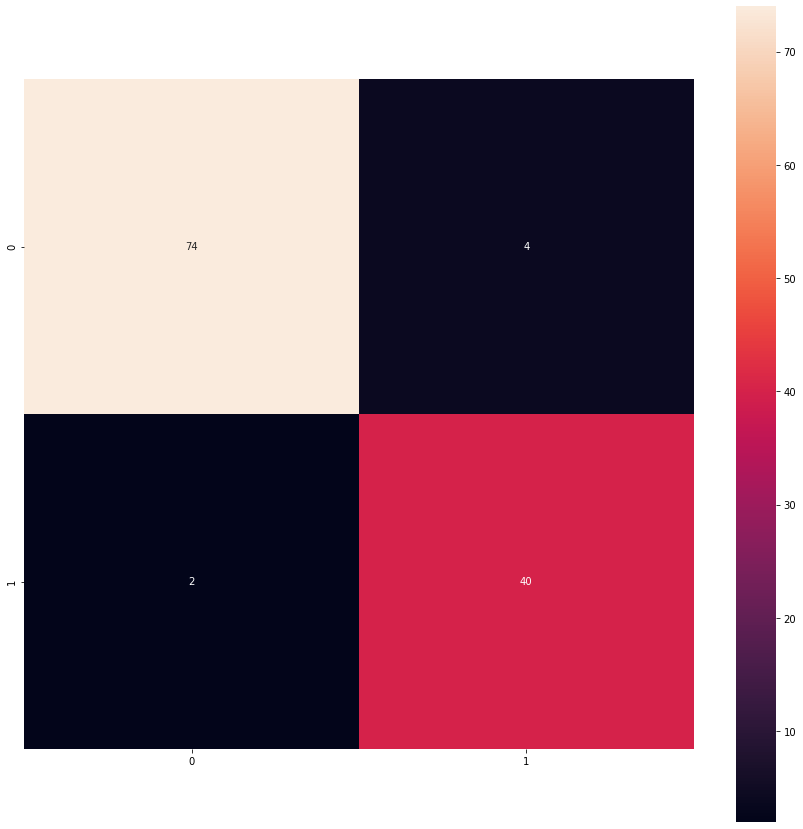

In [145]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, kNN.predict(X_test_norm))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("knn1_matrix.jpg")
plt.show()

## b) Rule induction

In [146]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)


In [147]:
import wittgenstein as lw
ri = lw.RIPPER()
ri.fit(X_train, Y_train, pos_class=1,random_state=42, verbosity=5)

irep/ripper.py: .fit: DeprecationWarning:


In the future, you should assign these parameters when initializating classifier instead of during model fitting: ['random_state', 'verbosity']




age: fit 71 unique vals into 10 bins
blood_glucose_random: fit 119 unique vals into 10 bins
blood_urea: fit 103 unique vals into 10 bins
serum_creatinine: fit 75 unique vals into 10 bins
sodium: fit 31 unique vals into 10 bins
potassium: fit 37 unique vals into 10 bins
haemoglobin: fit 104 unique vals into 10 bins
packed_cell_volume: fit 40 unique vals into 10 bins
white_blood_cell_count: fit 81 unique vals into 10 bins
red_blood_cell_count: fit 45 unique vals into 10 bins
growing ruleset...
initial model: []

pos_growset 72 pos_pruneset 36
neg_growset 115 neg_pruneset 57
growing rule from initial rule: [True]
gain 51.6 albumin=0.0
negs remaining: 40
gain 20.1 diabetes_mellitus=0
negs remaining: 20
gain 8.5 specific_gravity=1.02
negs remaining: 5
gain 3.9 appetite=0
negs remaining: 2
gain 1.4 peda_edema=0
negs remaining: 1
gain 0.58 blood_pressure=80.0
negs remaining: 0
grew rule: [albumin=0.0^diabetes_mellitus=0^specific_gravity=1.02^appetite=0^peda_edema=0^blood_pressure=80.0]
prune 

prune value of [albumin=0.0^diabetes_mellitus=0^specific_gravity=1.025^hypertension=0]: 0.86
prune value of [albumin=0.0^diabetes_mellitus=0^specific_gravity=1.025]: 0.85
prune value of [albumin=0.0^diabetes_mellitus=0]: 0.88
prune value of [albumin=0.0]: 0.78
grew revision [albumin=0.0^specific_gravity=1.025^hypertension=0]
pruned revision is [albumin=0.0^specific_gravity=1.025^hypertension=0]

calculate potential dl for ds with replacement [albumin=0.0^specific_gravity=1.025^hypertension=0]
calculate potential dl for ds with revision [albumin=0.0^diabetes_mellitus=0]

rule 2 of 6
original: [albumin=0.0^diabetes_mellitus=0^specific_gravity=1.025]) | 115 bits
replacement: [albumin=0.0^specific_gravity=1.025^hypertension=0] | 103 bits
revision: [albumin=0.0^diabetes_mellitus=0] | 169 bits
*best: [albumin=0.0^specific_gravity=1.025^hypertension=0] | 103 bits

examples remaining: 35 pos, 168 neg

creating replacement for 2 of 6: [specific_gravity=1.02^albumin=0.0^blood_pressure=60.0]
grow

In [148]:
ri_acc = accuracy_score(Y_test, ri.predict(X_test))

print(f"Training Accuracy of Rule Induction is {accuracy_score(Y_train, ri.predict(X_train))}")
print(f"Test Accuracy of Rule Induction is {ri_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, ri.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, ri.predict(X_test))}")
cond_count = ri.ruleset_.count_conds()
print(f'conds: {cond_count}')

Training Accuracy of Rule Induction is 0.9785714285714285
Test Accuracy of Rule Induction is 0.9333333333333333 

Confusion Matrix :- 
[[76  2]
 [ 6 36]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        78
           1       0.95      0.86      0.90        42

    accuracy                           0.93       120
   macro avg       0.94      0.92      0.93       120
weighted avg       0.93      0.93      0.93       120

conds: 18


[[76  2]
 [ 6 36]]


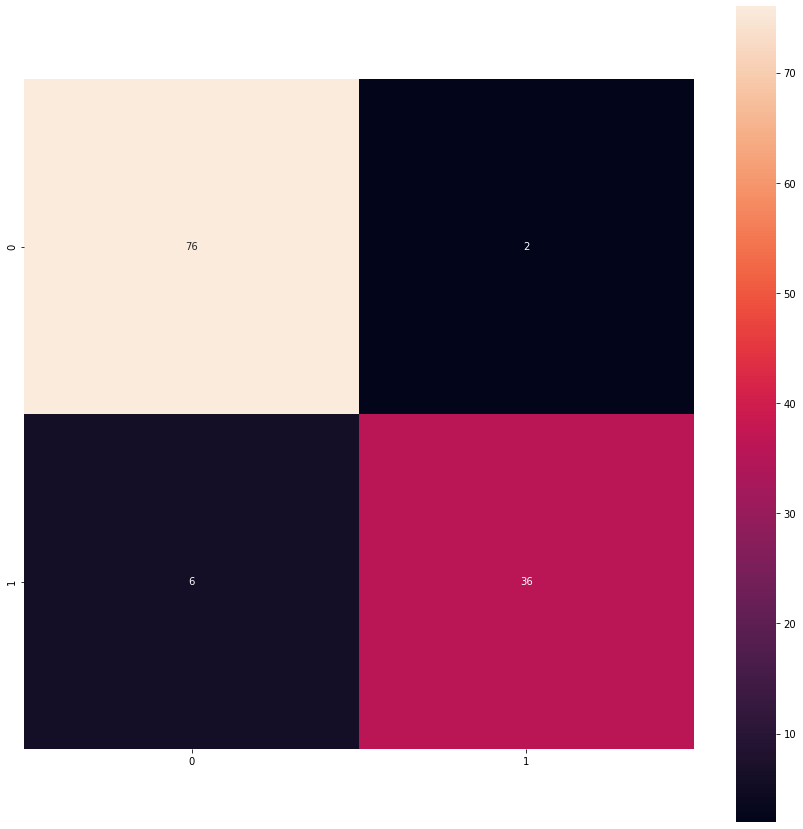

In [150]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, ri.predict(X_test))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("ri1_matrix.jpg")
plt.show()

In [151]:
ri.ruleset_.out_pretty()

[[albumin=0.0 ^ diabetes_mellitus=0 ^ specific_gravity=1.02 ^ appetite=0 ^ peda_edema=0 ^ blood_pressure=80.0] V
[albumin=0.0 ^ specific_gravity=1.025 ^ hypertension=0] V
[specific_gravity=1.02 ^ albumin=0.0 ^ blood_pressure=60.0] V
[specific_gravity=1.02 ^ blood_pressure=70.0 ^ serum_creatinine=1.0-1.2] V
[specific_gravity=1.02 ^ hypertension=0 ^ red_blood_cell_count=4.7-5.0]]


## c) Support Vector Machine

In [152]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [153]:
6.84# Normalizing data
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print(X_train_norm.shape)
print(X_test_norm.shape)

(280, 24)
(120, 24)


In [154]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm = svm.SVC()

#Train the model using the training sets
svm.fit(X_train_norm, Y_train)

SVC()

In [155]:
svm_acc = accuracy_score(Y_test, svm.predict(X_test_norm))

print(f"Training Accuracy of Support Vector Machine is {accuracy_score(Y_train, svm.predict(X_train_norm))}")
print(f"Test Accuracy of Support Vector Machine is {svm_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, svm.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, svm.predict(X_test_norm))}")

Training Accuracy of Support Vector Machine is 0.9928571428571429
Test Accuracy of Support Vector Machine is 0.9833333333333333 

Confusion Matrix :- 
[[78  0]
 [ 2 40]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        78
           1       1.00      0.95      0.98        42

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



[[78  0]
 [ 2 40]]


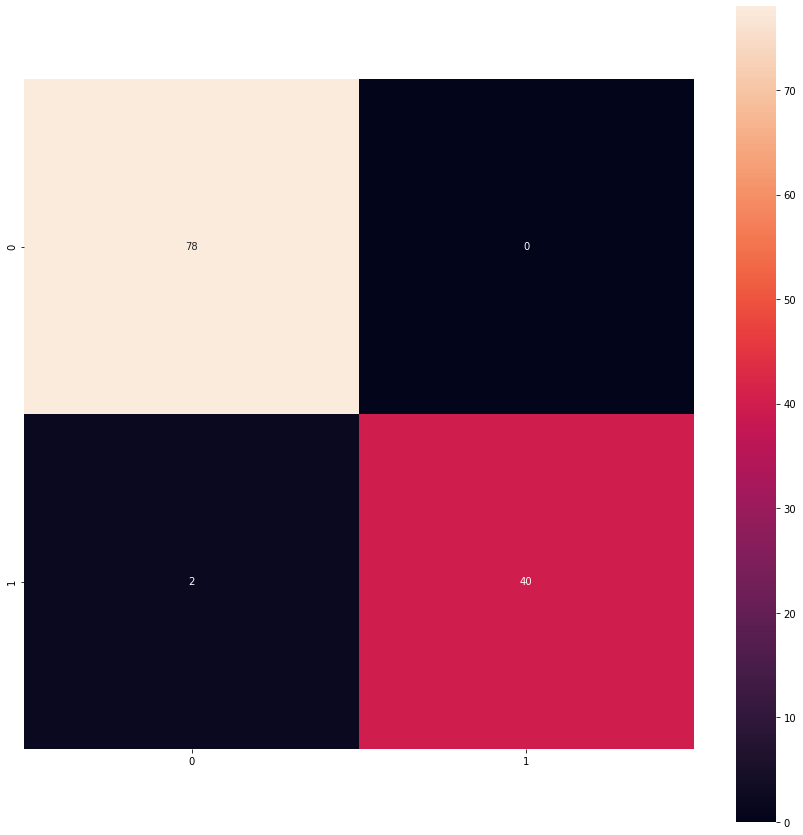

In [156]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, svm.predict(X_test_norm))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("svm1_matrix.jpg")
plt.show()

## d) Artificial Neural Network

In [157]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [158]:
# Normalizing data
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print(X_train_norm.shape)
print(X_test_norm.shape)

(280, 24)
(120, 24)


In [159]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=300)
parameter_space = {
'hidden_layer_sizes': range(2,108,10),
'activation': ['logistic', 'relu'],
'solver': ['sgd', 'adam'],
'learning_rate': ['constant','adaptive'],
'alpha': [0.001, 0.1],
'random_state': [1],
'batch_size': [10,30,112]
}

mlp = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=3)
mlp.fit(X_train_norm, Y_train) # X is train samples and y is the corresponding labels
import warnings; warnings.simplefilter('ignore')

print(mlp.best_params_)


{'activation': 'relu', 'alpha': 0.001, 'batch_size': 10, 'hidden_layer_sizes': 52, 'learning_rate': 'constant', 'random_state': 1, 'solver': 'adam'}


In [160]:
mlp_acc = accuracy_score(Y_test, mlp.predict(X_test_norm))

print(f"Training Accuracy of Multilayer Perceptron is {accuracy_score(Y_train, mlp.predict(X_train_norm))}")
print(f"Test Accuracy of Multilayer Perceptron is {mlp_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, mlp.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, mlp.predict(X_test_norm))}")

Training Accuracy of Multilayer Perceptron is 1.0
Test Accuracy of Multilayer Perceptron is 0.9833333333333333 

Confusion Matrix :- 
[[78  0]
 [ 2 40]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        78
           1       1.00      0.95      0.98        42

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



[[78  0]
 [ 2 40]]


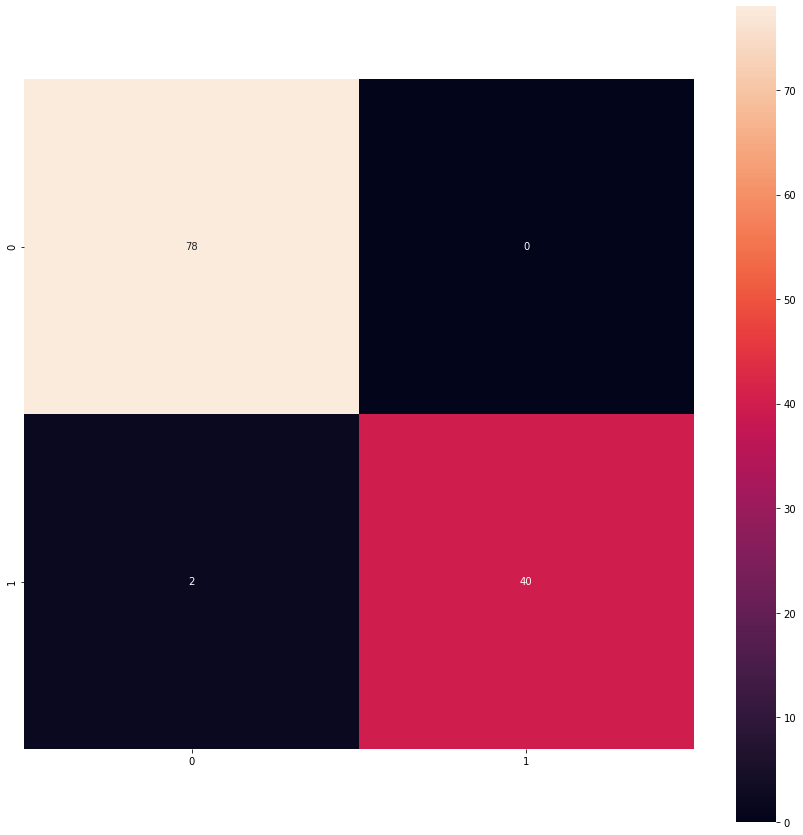

In [161]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, mlp.predict(X_test_norm))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("mlp1_matrix.jpg")
plt.show()

## e) Decision Tree

In [162]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [163]:
# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15),'min_samples_leaf': np.arange(1,50)}

# Creamos un árbol de clasificación
dtree_model=tree.DecisionTreeClassifier()

# Usamos gridsearch para evluar los parámetros
dtree_model = GridSearchCV(dtree_model, param_grid, n_jobs=-1, cv=3)

# 
dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}


In [164]:
dtree_model_acc = accuracy_score(Y_test, dtree_model.predict(X_test))

print(f"Training Accuracy of Decision Tree is {accuracy_score(Y_train, dtree_model.predict(X_train))}")
print(f"Test Accuracy of Decision Tree is {dtree_model_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, dtree_model.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, dtree_model.predict(X_test))}") 

Training Accuracy of Decision Tree is 0.9928571428571429
Test Accuracy of Decision Tree is 0.9666666666666667 

Confusion Matrix :- 
[[77  1]
 [ 3 39]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        78
           1       0.97      0.93      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



[[77  1]
 [ 3 39]]


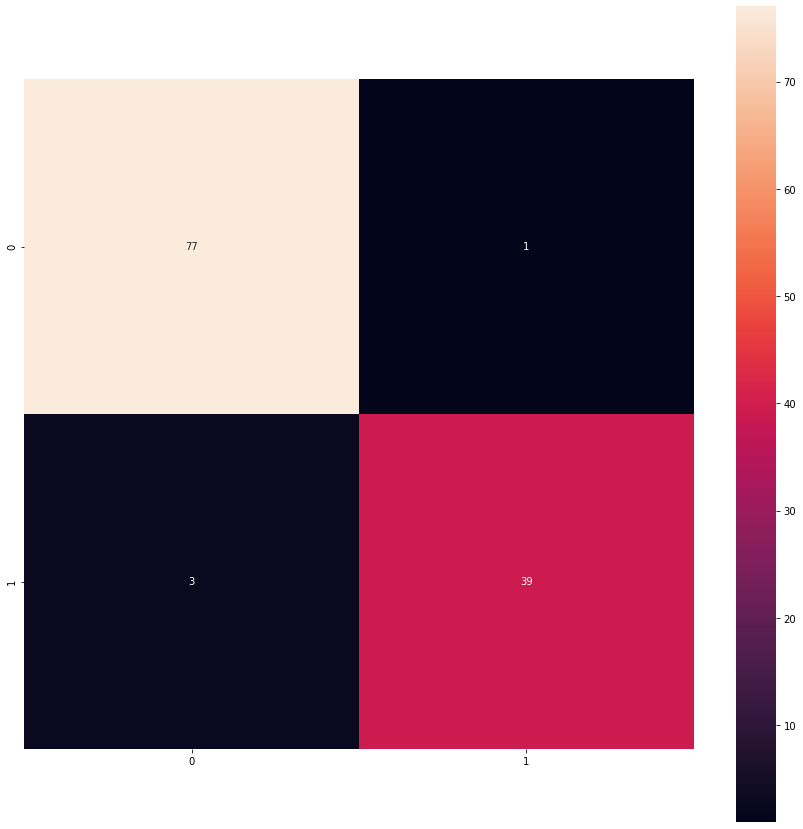

In [166]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, dtree_model.predict(X_test))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("dtree1_matrix.jpg")
plt.show()

## 2) With a univariate filter feature subset selection

## Mutual information filter will be used

In [167]:
df_mut = df

In [168]:
# Obtenemos X e Y
X = df_mut.drop(['class'], axis = 1)
Y = df_mut['class']
print(X.shape)
print(Y.shape)

(400, 24)
(400,)


Text(0.5, 1.0, 'Ordenamiento de características con el estadístico de informacion mutua y el conjunto de train')

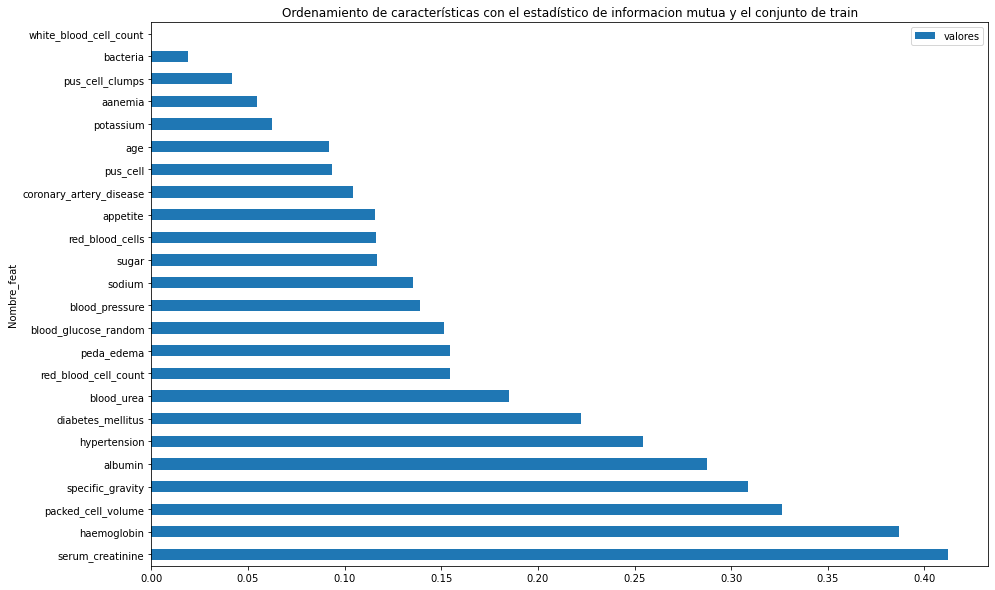

In [169]:
bestfeatures_MI = SelectKBest(score_func=mutual_info_classif, k=24)
fit_MI = bestfeatures_MI.fit(X_train, Y_train)

# gráfico de barras utilizando matplotlib
df_mut = pd.DataFrame({'Nombre_feat':X.columns, 'valores':fit_MI.scores_})
df_ordenado = df_mut.sort_values('valores', ascending=False)
plt.rcParams["figure.figsize"] = (15, 10)
ax = df_ordenado.plot.barh(x='Nombre_feat', y='valores', rot=0)
plt.savefig('inf_mutua.jpg')
plt.title("Ordenamiento de características con el estadístico de informacion mutua y el conjunto de train")

## a) KNN

In [170]:
# Obtenemos X e Y
X = df[['serum_creatinine','albumin','haemoglobin','specific_gravity','packed_cell_volume']]
Y = df['class']
print(X.shape)
print(Y.shape)

(400, 5)
(400,)


In [171]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [172]:
# Normalizing data
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print(X_train_norm.shape)
print(X_test_norm.shape)

(280, 5)
(120, 5)


Score [0.92553191 0.93548387 0.96774194]
Score [0.95744681 0.93548387 0.95698925]
Score [0.95744681 0.94623656 0.94623656]
Score [0.95744681 0.94623656 0.94623656]
Score [0.95744681 0.92473118 0.94623656]
Score [0.94680851 0.92473118 0.94623656]
Score [0.93617021 0.92473118 0.94623656]
Score [0.93617021 0.92473118 0.95698925]
Score [0.94680851 0.92473118 0.95698925]
Score [0.94680851 0.93548387 0.95698925]
Score [0.94680851 0.91397849 0.95698925]
Score [0.94680851 0.91397849 0.95698925]
Score [0.94680851 0.91397849 0.95698925]
Score [0.94680851 0.91397849 0.95698925]
Score [0.94680851 0.90322581 0.95698925]
Score [0.94680851 0.90322581 0.95698925]
Score [0.94680851 0.90322581 0.95698925]
Score [0.94680851 0.90322581 0.95698925]
Score [0.93617021 0.90322581 0.94623656]
Score [0.93617021 0.90322581 0.92473118]
Score [0.93617021 0.90322581 0.93548387]
Score [0.93617021 0.90322581 0.93548387]
Score [0.93617021 0.90322581 0.94623656]
Score [0.93617021 0.90322581 0.95698925]
Score [0.9255319

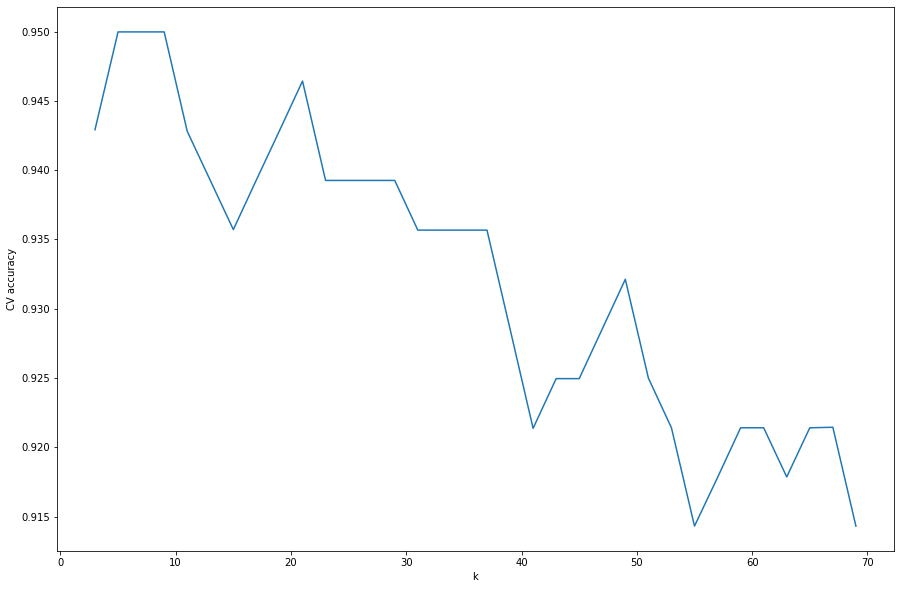

7


In [173]:
k_values = range(3,71,2)
cv_k_scores=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(kNN, X_train_norm, Y_train, cv=3, scoring='accuracy')
    print('Score',scores)
    cv_k_scores.append(scores.mean())
    
plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.rcParams["figure.figsize"] = (5, 8)
plt.show()

# Seleccionamos el máximo valor porque estamso considerando entropía
print(np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

In [174]:
kNN=KNeighborsClassifier(n_neighbors=np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])
kNN.fit(X_train_norm,Y_train) 

KNeighborsClassifier(n_neighbors=7)

In [175]:
knn2_acc = accuracy_score(Y_test, kNN.predict(X_test_norm))

print(f"Training Accuracy of KNN is {accuracy_score(Y_train, kNN.predict(X_train_norm))}")
print(f"Test Accuracy of KNN is {knn2_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, kNN.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, kNN.predict(X_test_norm))}")

Training Accuracy of KNN is 0.95
Test Accuracy of KNN is 0.9416666666666667 

Confusion Matrix :- 
[[71  5]
 [ 2 42]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        76
           1       0.89      0.95      0.92        44

    accuracy                           0.94       120
   macro avg       0.93      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



[[71  5]
 [ 2 42]]


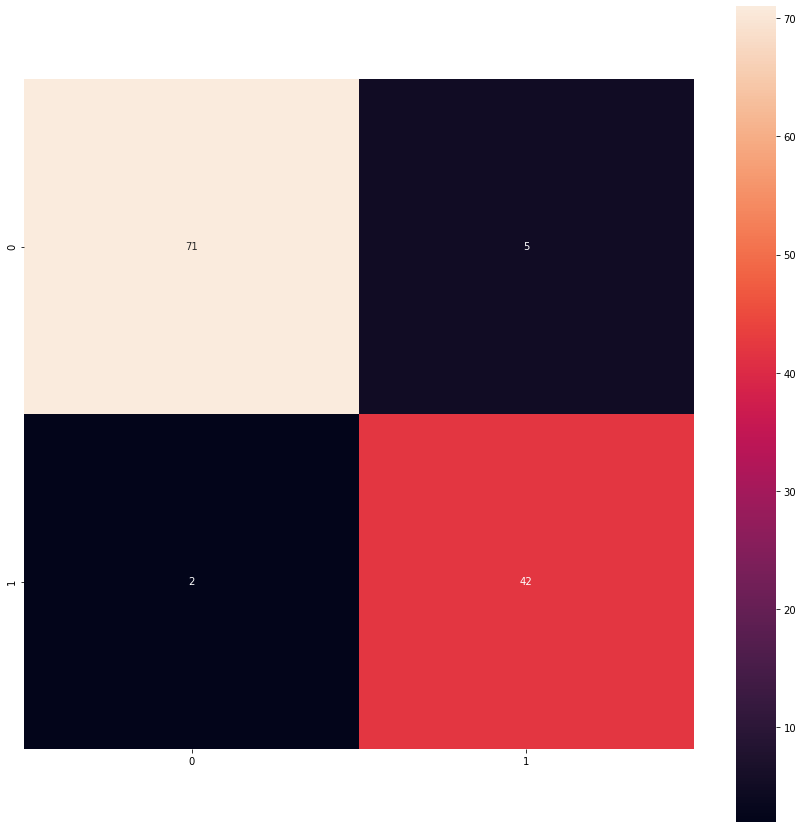

In [176]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, kNN.predict(X_test_norm))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("knn2_matrix.jpg")
plt.show()

## b) Rule induction

In [177]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)


In [178]:
import wittgenstein as lw
ri = lw.RIPPER()
ri.fit(X_train, Y_train, pos_class=1,random_state=42, verbosity=5)

serum_creatinine: fit 75 unique vals into 10 bins
haemoglobin: fit 104 unique vals into 10 bins
packed_cell_volume: fit 40 unique vals into 10 bins
growing ruleset...
initial model: []

pos_growset 72 pos_pruneset 36
neg_growset 115 neg_pruneset 57
growing rule from initial rule: [True]
gain 51.6 albumin=0.0
negs remaining: 40
gain 14.7 specific_gravity=1.02
negs remaining: 10
gain 5 serum_creatinine=1.0-1.2
negs remaining: 0
grew rule: [albumin=0.0^specific_gravity=1.02^serum_creatinine=1.0-1.2]
prune value of [albumin=0.0^specific_gravity=1.02^serum_creatinine=1.0-1.2]: 1
prune value of [albumin=0.0^specific_gravity=1.02]: 0.78
prune value of [albumin=0.0]: 0.45
pruned rule unchanged
updated ruleset: [[albumin=0.0^specific_gravity=1.02^serum_creatinine=1.0-1.2]]

rule theory bits| [albumin=0.0^specific_gravity=1.02^serum_creatinine=1.0-1.2] k 3 n 41 pr 0.07: 8.5 bits
exceptions_bits| [[albumin=0.0^specific_gravity=1.02^serum_creatinine=1.0-1.2]]: 
 N 280 p 21 fp 0 fn 87: exceptions_b

irep/ripper.py: .fit: DeprecationWarning:


In the future, you should assign these parameters when initializating classifier instead of during model fitting: ['random_state', 'verbosity']




In [179]:
ri2_acc = accuracy_score(Y_test, ri.predict(X_test))

print(f"Training Accuracy of Rule Induction is {accuracy_score(Y_train, ri.predict(X_train))}")
print(f"Test Accuracy of Rule Induction is {ri2_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, ri.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, ri.predict(X_test))}")
cond_count = ri.ruleset_.count_conds()
print(f'conds: {cond_count}')

Training Accuracy of Rule Induction is 0.9107142857142857
Test Accuracy of Rule Induction is 0.9166666666666666 

Confusion Matrix :- 
[[74  4]
 [ 6 36]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        78
           1       0.90      0.86      0.88        42

    accuracy                           0.92       120
   macro avg       0.91      0.90      0.91       120
weighted avg       0.92      0.92      0.92       120

conds: 20


[[74  4]
 [ 6 36]]


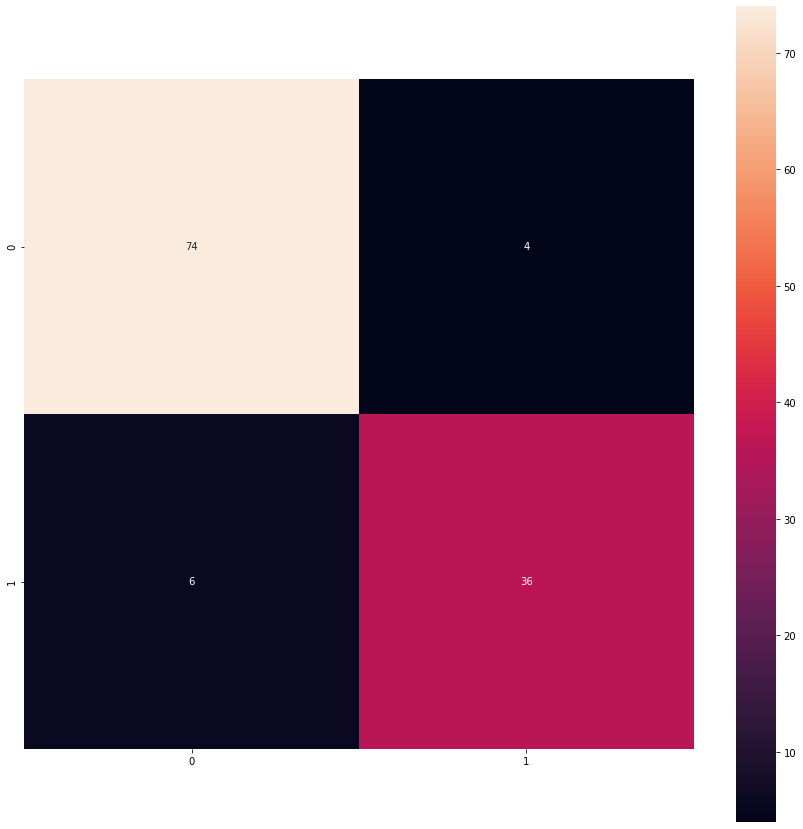

In [181]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, ri.predict(X_test))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("ri2_matrix.jpg")
plt.show()

In [182]:
ri.ruleset_.out_pretty()

[[albumin=0.0 ^ specific_gravity=1.02 ^ serum_creatinine=1.0-1.2] V
[albumin=0.0 ^ specific_gravity=1.025 ^ serum_creatinine=1.0-1.2] V
[albumin=0.0 ^ serum_creatinine=<0.6] V
[serum_creatinine=0.6-0.8 ^ specific_gravity=1.02] V
[serum_creatinine=0.8-1.0 ^ specific_gravity=1.025] V
[serum_creatinine=0.6-0.8 ^ specific_gravity=1.025] V
[serum_creatinine=0.8-1.0 ^ specific_gravity=1.02 ^ haemoglobin=>16.21] V
[serum_creatinine=0.8-1.0 ^ specific_gravity=1.02 ^ haemoglobin=13.64-14.63]]


## c) Support Vector Machine

In [183]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [184]:
# Normalizing data
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print(X_train_norm.shape)
print(X_test_norm.shape)

(280, 5)
(120, 5)


In [185]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm = svm.SVC()

#Train the model using the training sets
svm.fit(X_train_norm, Y_train)

SVC()

In [186]:
svm2_acc = accuracy_score(Y_test, svm.predict(X_test_norm))

print(f"Training Accuracy of Support Vector Machine is {accuracy_score(Y_train, svm.predict(X_train_norm))}")
print(f"Test Accuracy of Support Vector Machine is {svm2_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, svm.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, svm.predict(X_test_norm))}")

Training Accuracy of Support Vector Machine is 0.9678571428571429
Test Accuracy of Support Vector Machine is 0.9666666666666667 

Confusion Matrix :- 
[[77  1]
 [ 3 39]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        78
           1       0.97      0.93      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



[[77  1]
 [ 3 39]]


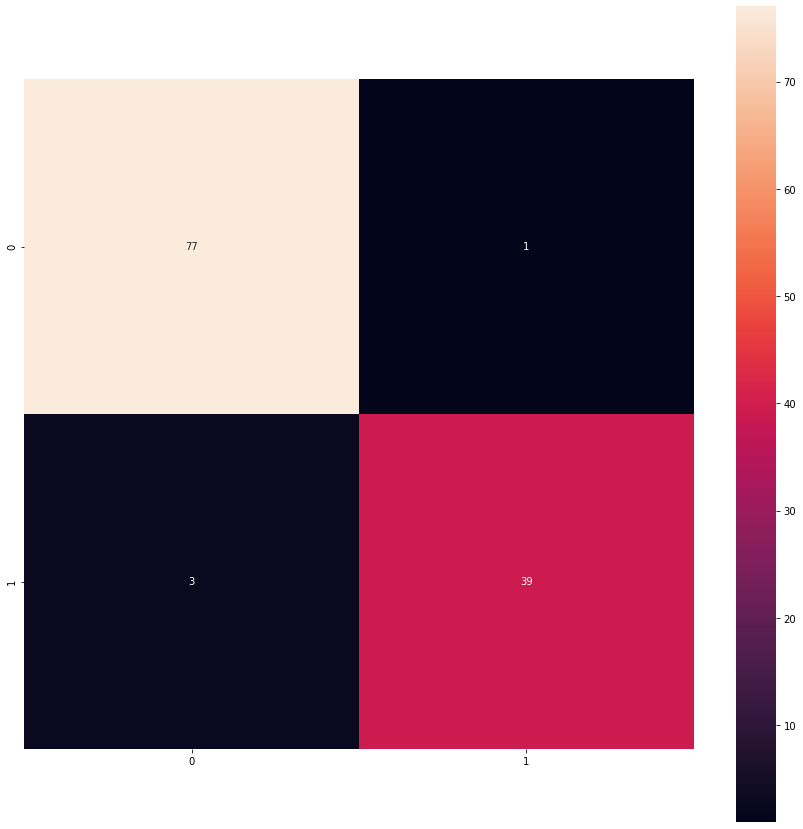

In [187]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, svm.predict(X_test_norm))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("svm2_matrix.jpg")
plt.show()

## d) Artificial Neural Network

In [188]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [189]:
# Normalizing data
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print(X_train_norm.shape)
print(X_test_norm.shape)

(280, 5)
(120, 5)


In [190]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=300)
parameter_space = {
'hidden_layer_sizes': range(2,108,10),
'activation': ['logistic', 'relu'],
'solver': ['sgd', 'adam'],
'learning_rate': ['constant','adaptive'],
'alpha': [0.001, 0.1],
'random_state': [1],
'batch_size': [10,30,112]
}

mlp = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=3)
mlp.fit(X_train_norm, Y_train) # X is train samples and y is the corresponding labels
import warnings; warnings.simplefilter('ignore')

print(mlp.best_params_)

{'activation': 'relu', 'alpha': 0.001, 'batch_size': 10, 'hidden_layer_sizes': 62, 'learning_rate': 'constant', 'random_state': 1, 'solver': 'adam'}


In [191]:
mlp2_acc = accuracy_score(Y_test, mlp.predict(X_test_norm))

print(f"Training Accuracy of Multilayer Perceptron is {accuracy_score(Y_train, mlp.predict(X_train_norm))}")
print(f"Test Accuracy of Multilayer Perceptron is {mlp2_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, mlp.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, mlp.predict(X_test_norm))}")

Training Accuracy of Multilayer Perceptron is 0.9928571428571429
Test Accuracy of Multilayer Perceptron is 0.95 

Confusion Matrix :- 
[[75  3]
 [ 3 39]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        78
           1       0.93      0.93      0.93        42

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



[[75  3]
 [ 3 39]]


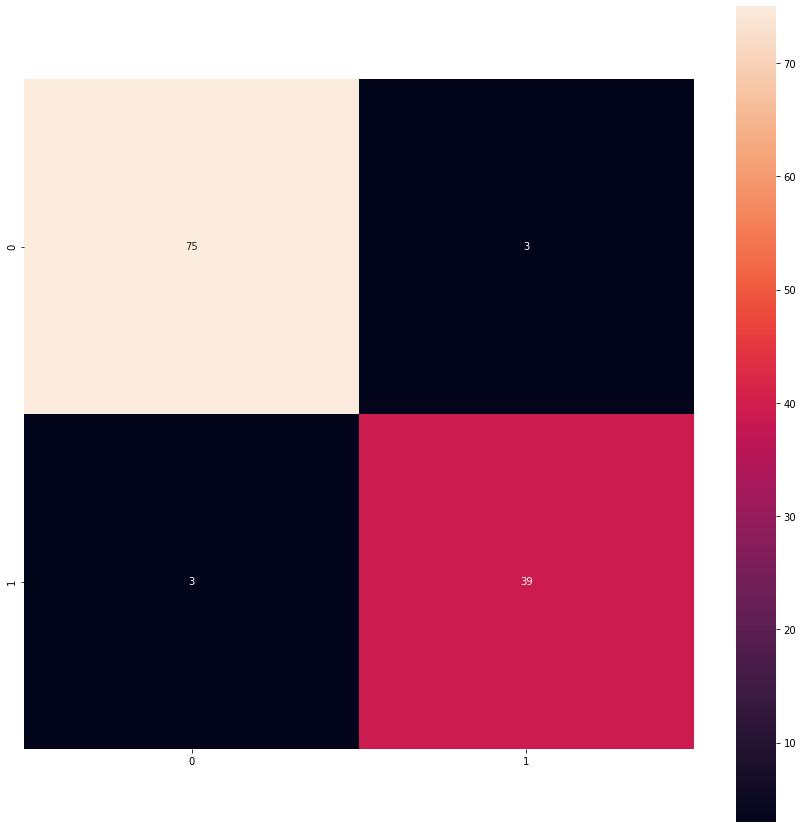

In [192]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, mlp.predict(X_test_norm))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("mlp2_matrix.jpg")
plt.show()

## e) Decision Tree

In [193]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [194]:
# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15),'min_samples_leaf': np.arange(1,50)}

# Creamos un árbol de clasificación
dtree_model=tree.DecisionTreeClassifier()

# Usamos gridsearch para evluar los parámetros
dtree_model = GridSearchCV(dtree_model, param_grid, n_jobs=-1, cv=3)

# 
dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}


In [195]:
dtree_model2_acc = accuracy_score(Y_test, dtree_model.predict(X_test))

print(f"Training Accuracy of Decision Tree is {accuracy_score(Y_train, dtree_model.predict(X_train))}")
print(f"Test Accuracy of Decision Tree is {dtree_model2_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, dtree_model.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, dtree_model.predict(X_test))}") 

Training Accuracy of Decision Tree is 0.9928571428571429
Test Accuracy of Decision Tree is 0.9666666666666667 

Confusion Matrix :- 
[[77  1]
 [ 3 39]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        78
           1       0.97      0.93      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



[[77  1]
 [ 3 39]]


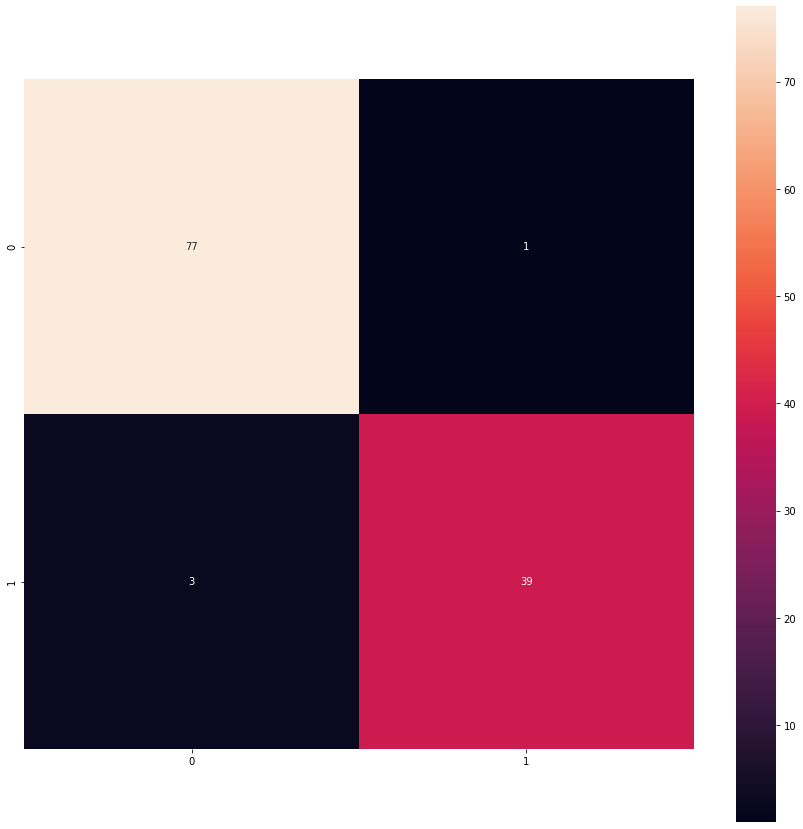

In [196]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, dtree_model.predict(X_test))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("dtree2_matrix.jpg")
plt.show()

# 3. With a multivariate filter feature subset selection

In [197]:
# Obtenemos X e Y
X = df.drop(['class'], axis = 1)
Y = df['class']
print(X.shape)
print(Y.shape)

(400, 24)
(400,)


In [198]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [199]:
import sklearn_relief as relief
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn_relief import Relief

fs = Relief(n_features = 5, random_state=0)
X_m_5 = fs.fit(X_train.values, Y_train.values)
X_m_5_train = fs.transform(X_train.values)
X_m_5_test = fs.transform(X_test.values)
X_train_values = X_train.values.T
features_index = []
for feature in X_m_5_train.T:
    for feature_i in range(len(X_train_values)):
        if np.array_equal(feature, X_train_values[feature_i]):
            features_index.append(feature_i)

features_names = X_train.columns
features_names[features_index]

Index(['white_blood_cell_count', 'blood_glucose_random', 'blood_urea', 'age',
       'blood_pressure'],
      dtype='object')

In [200]:
# Obtenemos X e Y
X = df[['white_blood_cell_count','blood_glucose_random','blood_urea','age','blood_pressure']]
Y = df['class']
print(X.shape)
print(Y.shape)

(400, 5)
(400,)


## a) KNN

In [201]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [202]:
# Normalizing data
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print(X_train_norm.shape)
print(X_test_norm.shape)

(280, 5)
(120, 5)


Score [0.72340426 0.77419355 0.77419355]
Score [0.75531915 0.77419355 0.78494624]
Score [0.74468085 0.78494624 0.78494624]
Score [0.76595745 0.8172043  0.80645161]
Score [0.73404255 0.82795699 0.80645161]
Score [0.73404255 0.79569892 0.80645161]
Score [0.74468085 0.80645161 0.80645161]
Score [0.76595745 0.79569892 0.82795699]
Score [0.76595745 0.80645161 0.82795699]
Score [0.77659574 0.79569892 0.80645161]
Score [0.77659574 0.78494624 0.8172043 ]
Score [0.78723404 0.78494624 0.8172043 ]
Score [0.78723404 0.77419355 0.8172043 ]
Score [0.77659574 0.75268817 0.82795699]
Score [0.76595745 0.75268817 0.82795699]
Score [0.77659574 0.75268817 0.82795699]
Score [0.77659574 0.75268817 0.82795699]
Score [0.78723404 0.75268817 0.8172043 ]
Score [0.78723404 0.75268817 0.8172043 ]
Score [0.79787234 0.76344086 0.8172043 ]
Score [0.74468085 0.76344086 0.80645161]
Score [0.73404255 0.76344086 0.80645161]
Score [0.73404255 0.77419355 0.80645161]
Score [0.73404255 0.77419355 0.79569892]
Score [0.7340425

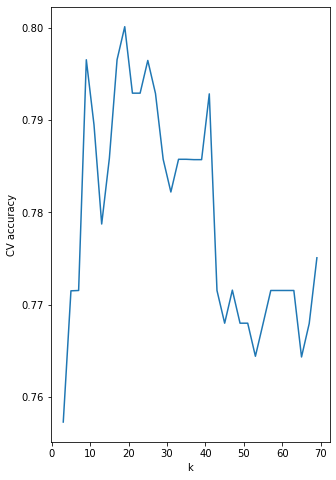

19


In [203]:
k_values = range(3,71,2)
cv_k_scores=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(kNN, X_train_norm, Y_train, cv=3, scoring='accuracy')
    print('Score',scores)
    cv_k_scores.append(scores.mean())
    
plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.show()

# Seleccionamos el máximo valor porque estamso considerando entropía
print(np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

In [204]:
kNN=KNeighborsClassifier(n_neighbors=np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])
kNN.fit(X_train_norm,Y_train) 

KNeighborsClassifier(n_neighbors=19)

In [205]:
knn3_acc = accuracy_score(Y_test, kNN.predict(X_test_norm))

print(f"Training Accuracy of KNN is {accuracy_score(Y_train, kNN.predict(X_train_norm))}")
print(f"Test Accuracy of KNN is {knn3_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, kNN.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, kNN.predict(X_test_norm))}")

Training Accuracy of KNN is 0.8035714285714286
Test Accuracy of KNN is 0.7333333333333333 

Confusion Matrix :- 
[[46 32]
 [ 0 42]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.59      0.74        78
           1       0.57      1.00      0.72        42

    accuracy                           0.73       120
   macro avg       0.78      0.79      0.73       120
weighted avg       0.85      0.73      0.74       120



[[46 32]
 [ 0 42]]


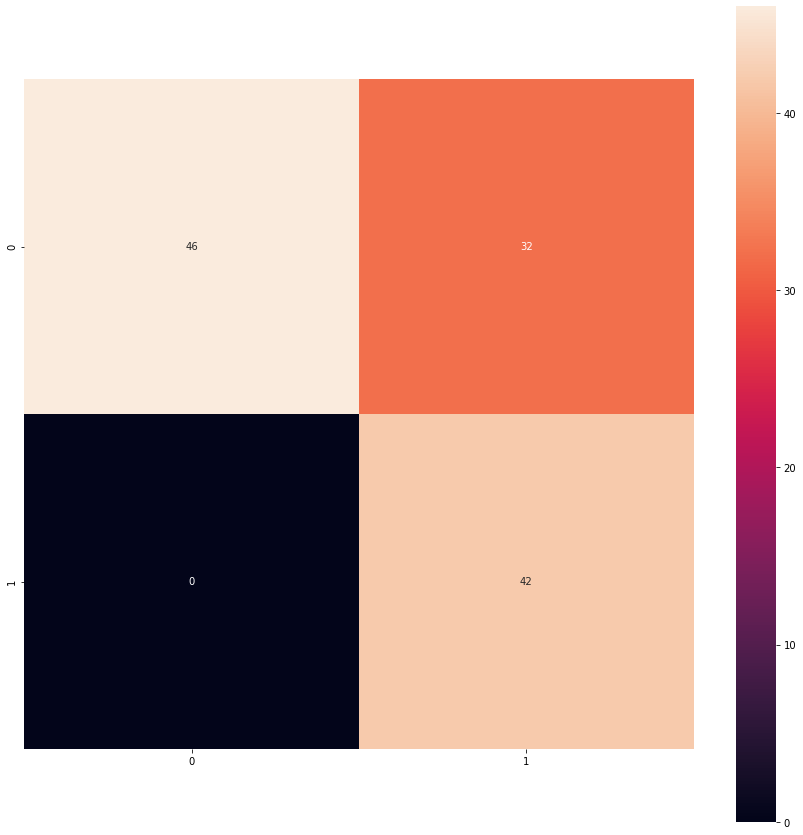

In [206]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, kNN.predict(X_test_norm))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("knn3_matrix.jpg")
plt.show()

## b) Rule induction

In [207]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [208]:
import wittgenstein as lw
ri = lw.RIPPER()
ri.fit(X_train, Y_train, pos_class=1,random_state=42, verbosity=5)

white_blood_cell_count: fit 81 unique vals into 10 bins
blood_glucose_random: fit 119 unique vals into 10 bins
blood_urea: fit 103 unique vals into 10 bins
age: fit 71 unique vals into 10 bins
growing ruleset...
initial model: []

pos_growset 72 pos_pruneset 36
neg_growset 115 neg_pruneset 57
growing rule from initial rule: [True]
gain 17.9 blood_pressure=60.0
negs remaining: 12
gain 4.7 blood_glucose_random=102.0-109.0
negs remaining: 0
grew rule: [blood_pressure=60.0^blood_glucose_random=102.0-109.0]
prune value of [blood_pressure=60.0^blood_glucose_random=102.0-109.0]: 1
prune value of [blood_pressure=60.0]: 0.29
pruned rule unchanged
updated ruleset: [[blood_pressure=60.0^blood_glucose_random=102.0-109.0]]

rule theory bits| [blood_pressure=60.0^blood_glucose_random=102.0-109.0] k 2 n 49 pr 0.04: 6.5 bits
exceptions_bits| [[blood_pressure=60.0^blood_glucose_random=102.0-109.0]]: 
 N 280 p 8 fp 0 fn 100: exceptions_bits 254
rule dl: 6.5
updated theory dl: 6.5
exceptions: 254
total d

irep/ripper.py: .fit: DeprecationWarning:


In the future, you should assign these parameters when initializating classifier instead of during model fitting: ['random_state', 'verbosity']




In [209]:
ri3_acc = accuracy_score(Y_test, ri.predict(X_test))

print(f"Training Accuracy of Rule Induction is {accuracy_score(Y_train, ri.predict(X_train))}")
print(f"Test Accuracy of Rule Induction is {ri3_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, ri.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, ri.predict(X_test))}")
cond_count = ri.ruleset_.count_conds()
print(f'conds: {cond_count}')

Training Accuracy of Rule Induction is 0.7142857142857143
Test Accuracy of Rule Induction is 0.725 

Confusion Matrix :- 
[[53 25]
 [ 8 34]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.87      0.68      0.76        78
           1       0.58      0.81      0.67        42

    accuracy                           0.73       120
   macro avg       0.72      0.74      0.72       120
weighted avg       0.77      0.72      0.73       120

conds: 6


[[53 25]
 [ 8 34]]


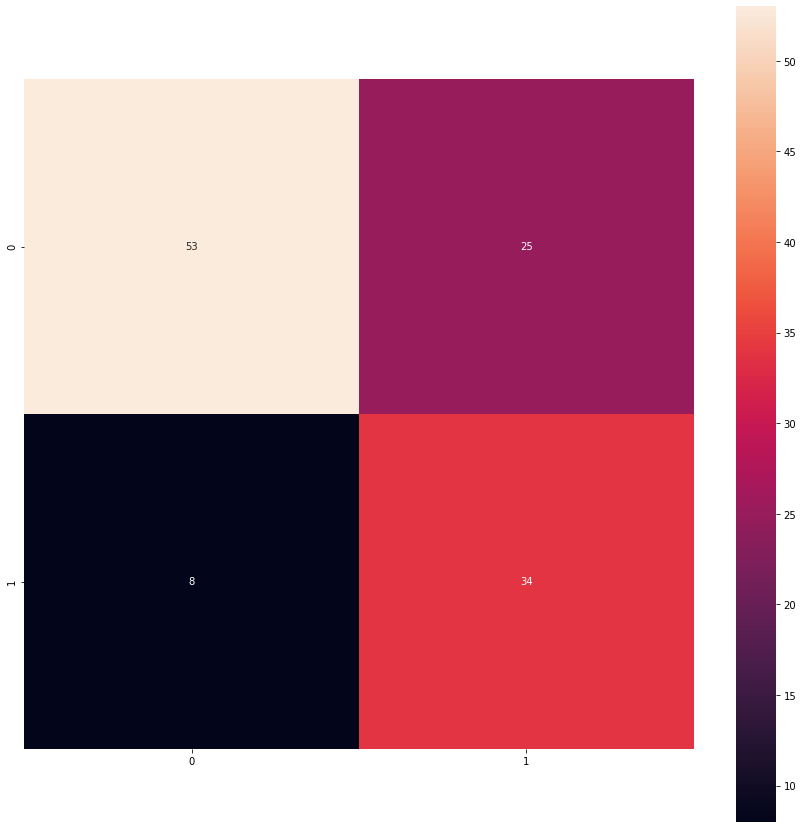

In [210]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, ri.predict(X_test))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("ri3_matrix.jpg")
plt.show()

In [211]:
ri.ruleset_.out_pretty()

[[blood_pressure=60.0 ^ blood_glucose_random=102.0-109.0] V
[blood_pressure=80.0] V
[blood_pressure=60.0] V
[blood_pressure=70.0 ^ blood_glucose_random=<88.0]]


## c) Support Vector Machine

In [212]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [213]:
# Normalizing data
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print(X_train_norm.shape)
print(X_test_norm.shape)

(280, 5)
(120, 5)


In [214]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm = svm.SVC()

#Train the model using the training sets
svm.fit(X_train_norm, Y_train)

SVC()

In [215]:
svm3_acc = accuracy_score(Y_test, svm.predict(X_test_norm))

print(f"Training Accuracy of Support Vector Machine is {accuracy_score(Y_train, svm.predict(X_train_norm))}")
print(f"Test Accuracy of Support Vector Machine is {svm3_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, svm.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, svm.predict(X_test_norm))}")

Training Accuracy of Support Vector Machine is 0.8571428571428571
Test Accuracy of Support Vector Machine is 0.8583333333333333 

Confusion Matrix :- 
[[64 14]
 [ 3 39]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.82      0.88        78
           1       0.74      0.93      0.82        42

    accuracy                           0.86       120
   macro avg       0.85      0.87      0.85       120
weighted avg       0.88      0.86      0.86       120



[[64 14]
 [ 3 39]]


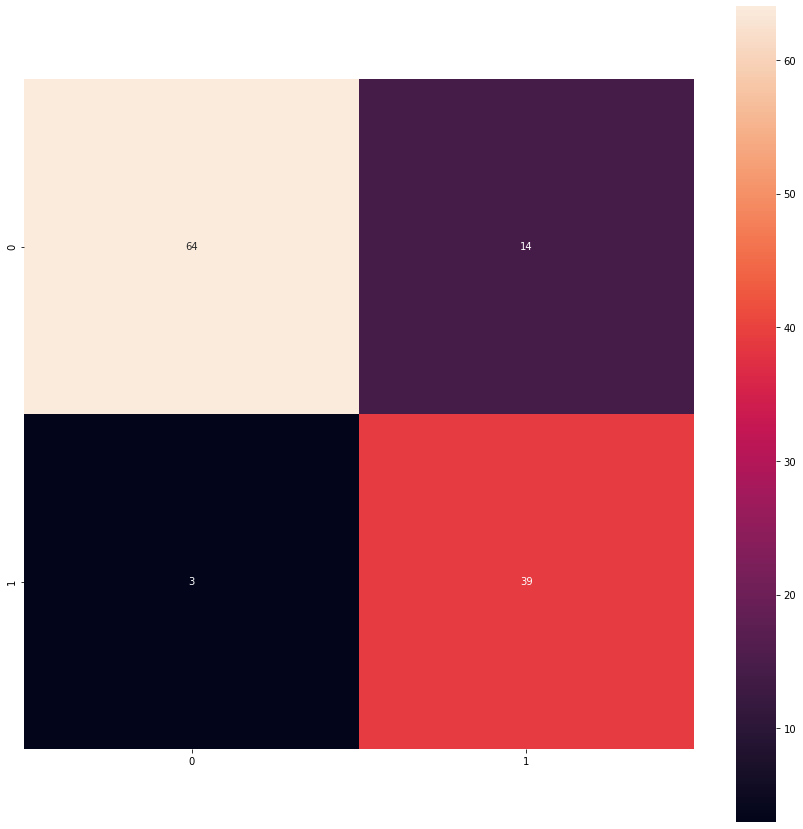

In [216]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, svm.predict(X_test_norm))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("svm3_matrix.jpg")
plt.show()

## d) Artificial Neural Network

In [217]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [218]:
# Normalizing data
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print(X_train_norm.shape)
print(X_test_norm.shape)

(280, 5)
(120, 5)


In [219]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=300)
parameter_space = {
'hidden_layer_sizes': range(2,108,10),
'activation': ['logistic', 'relu'],
'solver': ['sgd', 'adam'],
'learning_rate': ['constant','adaptive'],
'alpha': [0.001, 0.1],
'random_state': [1],
'batch_size': [10,30,112]
}

mlp = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=3)
mlp.fit(X_train_norm, Y_train) # X is train samples and y is the corresponding labels
import warnings; warnings.simplefilter('ignore')

print(mlp.best_params_)

{'activation': 'relu', 'alpha': 0.001, 'batch_size': 10, 'hidden_layer_sizes': 22, 'learning_rate': 'constant', 'random_state': 1, 'solver': 'adam'}


In [220]:
mlp3_acc = accuracy_score(Y_test, mlp.predict(X_test_norm))

print(f"Training Accuracy of Multilayer Perceptron is {accuracy_score(Y_train, mlp.predict(X_train_norm))}")
print(f"Test Accuracy of Multilayer Perceptron is {mlp3_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, mlp.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, mlp.predict(X_test_norm))}")

Training Accuracy of Multilayer Perceptron is 0.9071428571428571
Test Accuracy of Multilayer Perceptron is 0.8416666666666667 

Confusion Matrix :- 
[[64 14]
 [ 5 37]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        78
           1       0.73      0.88      0.80        42

    accuracy                           0.84       120
   macro avg       0.83      0.85      0.83       120
weighted avg       0.86      0.84      0.84       120



[[64 14]
 [ 5 37]]


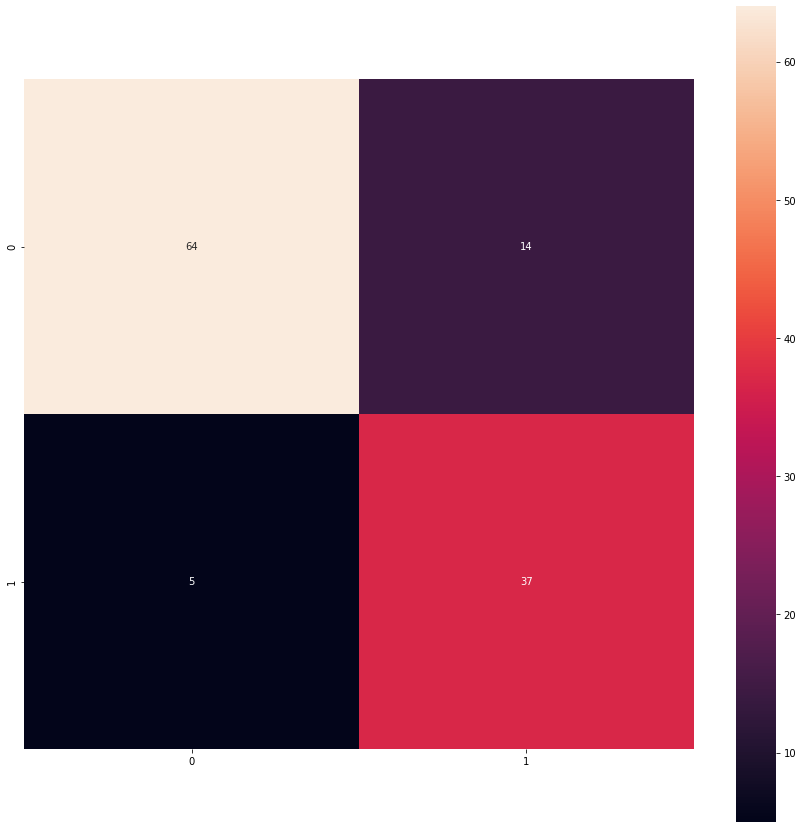

In [221]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, mlp.predict(X_test_norm))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("mlp3_matrix.jpg")
plt.show()

## e) Decision Tree

In [222]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [223]:
# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15),'min_samples_leaf': np.arange(1,50)}

# Creamos un árbol de clasificación
dtree_model=tree.DecisionTreeClassifier()

# Usamos gridsearch para evluar los parámetros
dtree_model = GridSearchCV(dtree_model, param_grid, n_jobs=-1, cv=3)

# 
dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6}


In [224]:
dtree_model3_acc = accuracy_score(Y_test, dtree_model.predict(X_test))

print(f"Training Accuracy of Decision Tree is {accuracy_score(Y_train, dtree_model.predict(X_train))}")
print(f"Test Accuracy of Decision Tree is {dtree_model3_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, dtree_model.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, dtree_model.predict(X_test))}") 

Training Accuracy of Decision Tree is 0.9
Test Accuracy of Decision Tree is 0.875 

Confusion Matrix :- 
[[66 12]
 [ 3 39]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.85      0.90        78
           1       0.76      0.93      0.84        42

    accuracy                           0.88       120
   macro avg       0.86      0.89      0.87       120
weighted avg       0.89      0.88      0.88       120



[[66 12]
 [ 3 39]]


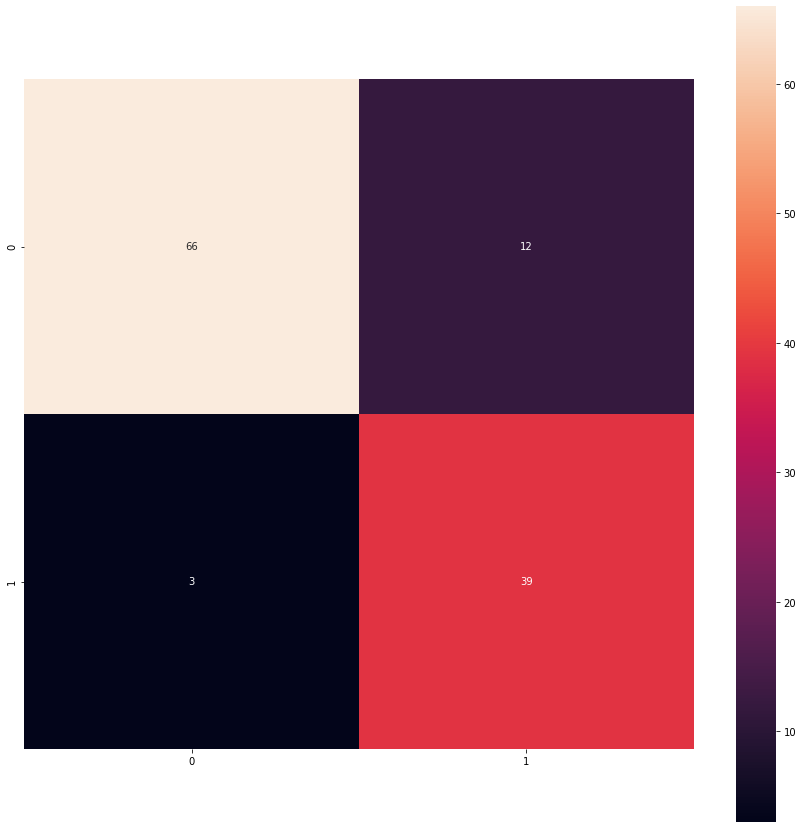

In [226]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, dtree_model.predict(X_test))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("dtree3_matrix.jpg")
plt.show()

# 4. With a multivariate wrapper feature subset selection

## Sequential Forward Selection

In [227]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.neighbors import KNeighborsClassifier

In [228]:
# Obtenemos X e Y
X = df.drop(['class'], axis = 1)
Y = df['class']
print(X.shape)
print(Y.shape)

(400, 24)
(400,)


In [229]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

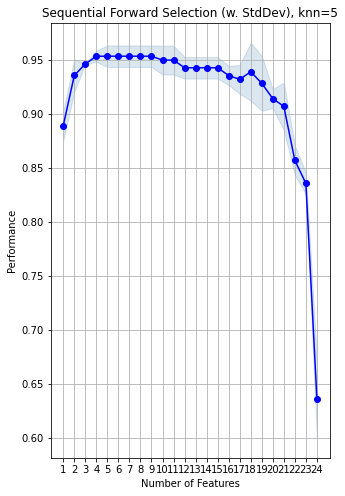

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(14,)","[0.9042553191489362, 0.8924731182795699, 0.870...",0.889232,"(haemoglobin,)",0.031013,0.013781,0.009745
2,"(3, 14)","[0.925531914893617, 0.9247311827956989, 0.9569...",0.935751,"(albumin, haemoglobin)",0.033803,0.015021,0.010622
3,"(3, 11, 14)","[0.9468085106382979, 0.946236559139785, 0.9462...",0.946427,"(albumin, serum_creatinine, haemoglobin)",0.000607,0.00027,0.000191
4,"(3, 4, 11, 14)","[0.9574468085106383, 0.956989247311828, 0.9462...",0.953558,"(albumin, sugar, serum_creatinine, haemoglobin)",0.011657,0.00518,0.003663
5,"(3, 4, 11, 14, 19)","[0.9468085106382979, 0.967741935483871, 0.9462...",0.953596,"(albumin, sugar, serum_creatinine, haemoglobin...",0.022516,0.010006,0.007075
6,"(2, 3, 4, 11, 14, 19)","[0.9468085106382979, 0.967741935483871, 0.9462...",0.953596,"(specific_gravity, albumin, sugar, serum_creat...",0.022516,0.010006,0.007075
7,"(2, 3, 4, 7, 11, 14, 19)","[0.9468085106382979, 0.967741935483871, 0.9462...",0.953596,"(specific_gravity, albumin, sugar, pus_cell_cl...",0.022516,0.010006,0.007075
8,"(2, 3, 4, 7, 8, 11, 14, 19)","[0.9468085106382979, 0.967741935483871, 0.9462...",0.953596,"(specific_gravity, albumin, sugar, pus_cell_cl...",0.022516,0.010006,0.007075
9,"(2, 3, 4, 7, 8, 11, 14, 19, 20)","[0.9468085106382979, 0.967741935483871, 0.9462...",0.953596,"(specific_gravity, albumin, sugar, pus_cell_cl...",0.022516,0.010006,0.007075
10,"(2, 3, 4, 7, 8, 11, 14, 18, 19, 20)","[0.9468085106382979, 0.967741935483871, 0.9354...",0.950011,"(specific_gravity, albumin, sugar, pus_cell_cl...",0.03007,0.013363,0.009449


In [230]:
valor_k = 5

knn = KNeighborsClassifier(n_neighbors=valor_k)
sfs = SFS(knn, 
           k_features=24, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=3)

sfs = sfs.fit(X_train, Y_train)

# Plotting the results
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
#plt.ylim([0.6, 0.8])
plt.title('Sequential Forward Selection (w. StdDev), knn=' + str(valor_k))
plt.grid()
plt.rcParams["figure.figsize"] = (10, 8)
plt.savefig('wrapper.png')
plt.show()

pd.DataFrame.from_dict(sfs.get_metric_dict()).T


In [231]:
df.iloc[:,[3,4,11,14,19]]

,albumin,sugar,serum_creatinine,haemoglobin,diabetes_mellitus
0,1.0,0.0,1.2,15.4,1
1,4.0,0.0,0.8,11.3,0
2,2.0,3.0,1.8,9.6,1
3,4.0,0.0,3.8,11.2,0
4,2.0,0.0,1.4,11.6,0
...,...,...,...,...,...
395,0.0,0.0,0.5,15.7,0
396,0.0,0.0,1.2,16.5,0
397,0.0,0.0,0.6,15.8,0
398,0.0,0.0,1.0,14.2,0


#### The features chosen are specific_gravity, albumin, sugar, haemoglobin and hypertension

In [232]:
# Obtenemos X e Y
X = df.iloc[:,[3,4,11,14,19]]
Y = df['class']
print(X.shape)
print(Y.shape)

(400, 5)
(400,)


## a) KNN

In [233]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [234]:
# Normalizing data
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print(X_train_norm.shape)
print(X_test_norm.shape)

(280, 5)
(120, 5)


Score [0.95744681 0.98924731 0.95698925]
Score [0.95744681 0.98924731 0.95698925]
Score [0.93617021 0.98924731 0.95698925]
Score [0.93617021 0.97849462 0.94623656]
Score [0.93617021 0.95698925 0.94623656]
Score [0.92553191 0.95698925 0.93548387]
Score [0.92553191 0.95698925 0.93548387]
Score [0.92553191 0.95698925 0.93548387]
Score [0.92553191 0.94623656 0.93548387]
Score [0.92553191 0.94623656 0.93548387]
Score [0.92553191 0.94623656 0.93548387]
Score [0.92553191 0.94623656 0.93548387]
Score [0.92553191 0.94623656 0.93548387]
Score [0.92553191 0.94623656 0.93548387]
Score [0.92553191 0.94623656 0.93548387]
Score [0.92553191 0.94623656 0.93548387]
Score [0.92553191 0.93548387 0.93548387]
Score [0.91489362 0.93548387 0.92473118]
Score [0.91489362 0.93548387 0.92473118]
Score [0.91489362 0.93548387 0.91397849]
Score [0.91489362 0.92473118 0.92473118]
Score [0.90425532 0.91397849 0.92473118]
Score [0.90425532 0.91397849 0.92473118]
Score [0.90425532 0.91397849 0.92473118]
Score [0.9042553

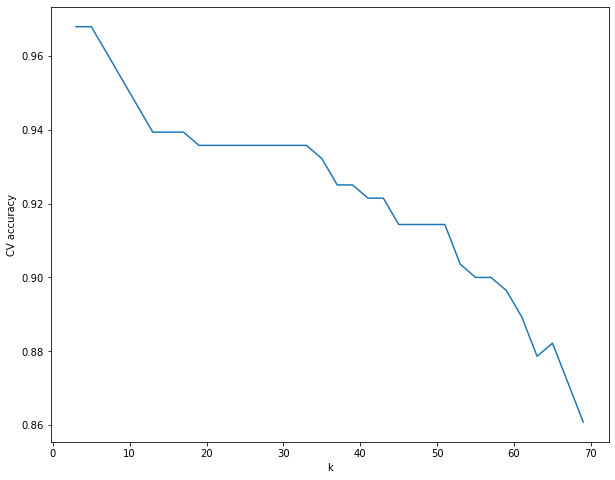

3


In [235]:
k_values = range(3,71,2)
cv_k_scores=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(kNN, X_train_norm, Y_train, cv=3, scoring='accuracy')
    print('Score',scores)
    cv_k_scores.append(scores.mean())
    
plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.show()

# Seleccionamos el máximo valor porque estamso considerando entropía
print(np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

In [236]:
kNN=KNeighborsClassifier(n_neighbors=np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])
kNN.fit(X_train_norm,Y_train) 

KNeighborsClassifier(n_neighbors=3)

In [237]:
knn4_acc = accuracy_score(Y_test, kNN.predict(X_test_norm))

print(f"Training Accuracy of KNN is {accuracy_score(Y_train, kNN.predict(X_train_norm))}")
print(f"Test Accuracy of KNN is {knn4_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, kNN.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, kNN.predict(X_test_norm))}")

Training Accuracy of KNN is 0.9714285714285714
Test Accuracy of KNN is 0.95 

Confusion Matrix :- 
[[75  3]
 [ 3 39]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        78
           1       0.93      0.93      0.93        42

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



[[75  3]
 [ 3 39]]


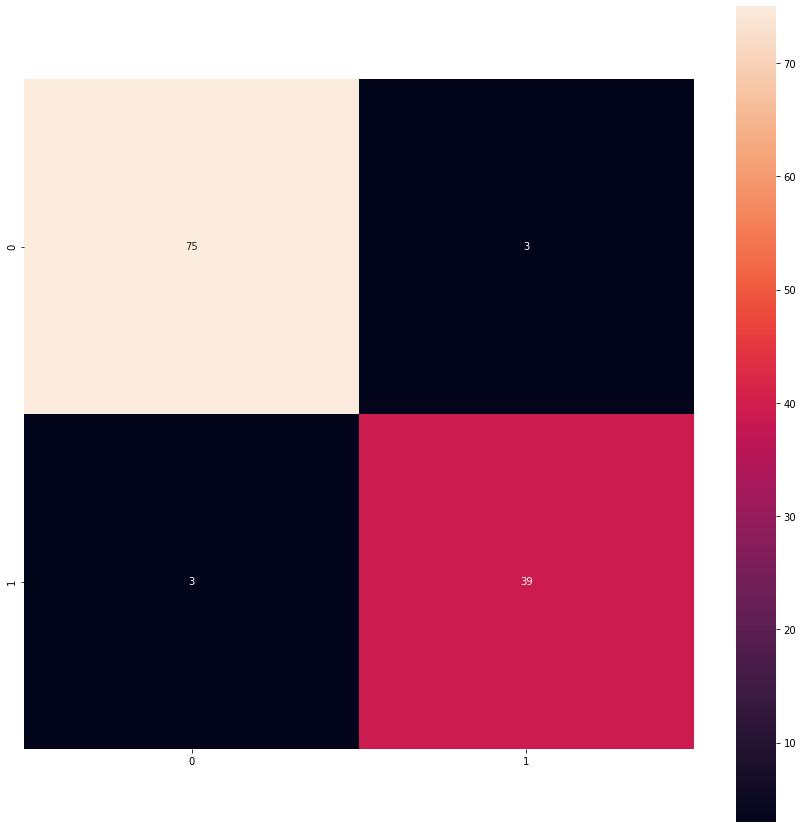

In [238]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, kNN.predict(X_test_norm))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("knn4_matrix.jpg")
plt.show()

## b) Rule induction

In [239]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [240]:
import wittgenstein as lw
ri = lw.RIPPER()
ri.fit(X_train, Y_train, pos_class=1,random_state=42, verbosity=5)

serum_creatinine: fit 75 unique vals into 10 bins
haemoglobin: fit 104 unique vals into 10 bins
growing ruleset...
initial model: []

pos_growset 72 pos_pruneset 36
neg_growset 115 neg_pruneset 57
growing rule from initial rule: [True]
gain 51.6 albumin=0.0
negs remaining: 40
gain 20.1 diabetes_mellitus=0
negs remaining: 20
gain 6.3 serum_creatinine=1.0-1.2
negs remaining: 3
gain 1.3 sugar=0.0
negs remaining: 2
gain 0.56 haemoglobin=>16.21
negs remaining: 0
grew rule: [albumin=0.0^diabetes_mellitus=0^serum_creatinine=1.0-1.2^sugar=0.0^haemoglobin=>16.21]
prune value of [albumin=0.0^diabetes_mellitus=0^serum_creatinine=1.0-1.2^sugar=0.0^haemoglobin=>16.21]: 1
prune value of [albumin=0.0^diabetes_mellitus=0^serum_creatinine=1.0-1.2^sugar=0.0]: 1
prune value of [albumin=0.0^diabetes_mellitus=0^serum_creatinine=1.0-1.2]: 1
prune value of [albumin=0.0^diabetes_mellitus=0]: 0.64
prune value of [albumin=0.0]: 0.45
pruned rule: [albumin=0.0^diabetes_mellitus=0^serum_creatinine=1.0-1.2]
updated

irep/ripper.py: .fit: DeprecationWarning:


In the future, you should assign these parameters when initializating classifier instead of during model fitting: ['random_state', 'verbosity']




In [241]:
ri4_acc = accuracy_score(Y_test, ri.predict(X_test))

print(f"Training Accuracy of Rule Induction is {accuracy_score(Y_train, ri.predict(X_train))}")
print(f"Test Accuracy of Rule Induction is {ri4_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, ri.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, ri.predict(X_test))}")
cond_count = ri.ruleset_.count_conds()
print(f'conds: {cond_count}')

Training Accuracy of Rule Induction is 0.6857142857142857
Test Accuracy of Rule Induction is 0.7666666666666667 

Confusion Matrix :- 
[[72  6]
 [22 20]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.77      0.92      0.84        78
           1       0.77      0.48      0.59        42

    accuracy                           0.77       120
   macro avg       0.77      0.70      0.71       120
weighted avg       0.77      0.77      0.75       120

conds: 21


[[72  6]
 [22 20]]


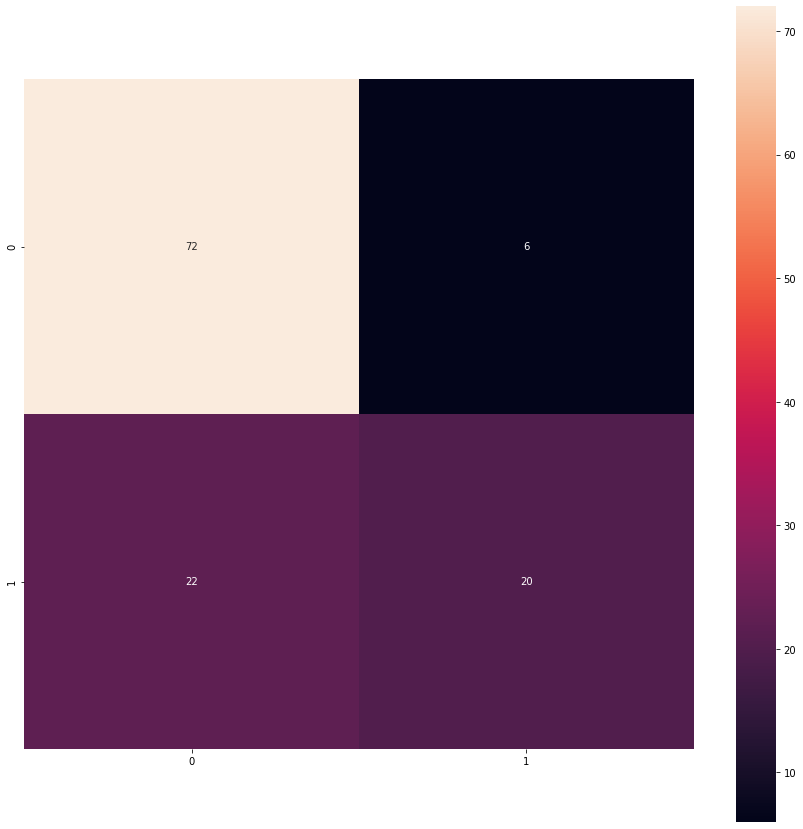

In [243]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, ri.predict(X_test))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("ri4_matrix.jpg")
plt.show()

In [244]:
ri.ruleset_.out_pretty()

[[albumin=0.0 ^ diabetes_mellitus=0 ^ serum_creatinine=1.0-1.2] V
[albumin=0.0 ^ serum_creatinine=<0.6] V
[albumin=0.0 ^ serum_creatinine=0.6-0.8 ^ diabetes_mellitus=0] V
[serum_creatinine=0.8-1.0 ^ diabetes_mellitus=0 ^ haemoglobin=13.64-14.63] V
[serum_creatinine=0.8-1.0 ^ diabetes_mellitus=0 ^ haemoglobin=15.22-16.21] V
[serum_creatinine=0.8-1.0 ^ haemoglobin=14.63-15.22] V
[serum_creatinine=0.8-1.0 ^ diabetes_mellitus=0 ^ haemoglobin=>16.21] V
[serum_creatinine=0.8-1.0 ^ haemoglobin=12.6-13.64]]


## c) Support Vector Machine

In [245]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [246]:
# Normalizing data
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print(X_train_norm.shape)
print(X_test_norm.shape)

(280, 5)
(120, 5)


In [247]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm = svm.SVC()

#Train the model using the training sets
svm.fit(X_train_norm, Y_train)

SVC()

In [248]:
svm4_acc = accuracy_score(Y_test, svm.predict(X_test_norm))

print(f"Training Accuracy of Support Vector Machine is {accuracy_score(Y_train, svm.predict(X_train_norm))}")
print(f"Test Accuracy of Support Vector Machine is {svm4_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, svm.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, svm.predict(X_test_norm))}")

Training Accuracy of Support Vector Machine is 0.95
Test Accuracy of Support Vector Machine is 0.9166666666666666 

Confusion Matrix :- 
[[71  7]
 [ 3 39]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        78
           1       0.85      0.93      0.89        42

    accuracy                           0.92       120
   macro avg       0.90      0.92      0.91       120
weighted avg       0.92      0.92      0.92       120



[[71  7]
 [ 3 39]]


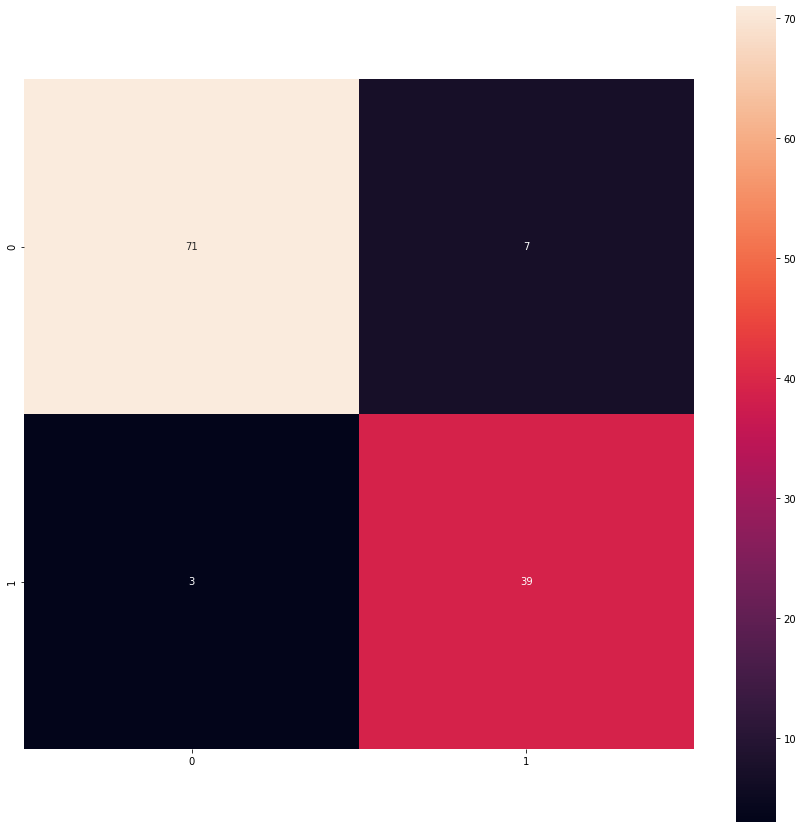

In [249]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, svm.predict(X_test_norm))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("svm4_matrix.jpg")
plt.show()

## d) Artificial Neural Network

In [250]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [251]:
# Normalizing data
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print(X_train_norm.shape)
print(X_test_norm.shape)

(280, 5)
(120, 5)


In [252]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=300)
parameter_space = {
'hidden_layer_sizes': range(2,108,10),
'activation': ['logistic', 'relu'],
'solver': ['sgd', 'adam'],
'learning_rate': ['constant','adaptive'],
'alpha': [0.001, 0.1],
'random_state': [1],
'batch_size': [10,30,112]
}

mlp = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=3)
mlp.fit(X_train_norm, Y_train) # X is train samples and y is the corresponding labels
import warnings; warnings.simplefilter('ignore')

print(mlp.best_params_)

{'activation': 'logistic', 'alpha': 0.001, 'batch_size': 112, 'hidden_layer_sizes': 2, 'learning_rate': 'constant', 'random_state': 1, 'solver': 'adam'}


In [253]:
mlp4_acc = accuracy_score(Y_test, mlp.predict(X_test_norm))

print(f"Training Accuracy of Multilayer Perceptron is {accuracy_score(Y_train, mlp.predict(X_train_norm))}")
print(f"Test Accuracy of Multilayer Perceptron is {mlp4_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, mlp.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, mlp.predict(X_test_norm))}")

Training Accuracy of Multilayer Perceptron is 0.9464285714285714
Test Accuracy of Multilayer Perceptron is 0.9166666666666666 

Confusion Matrix :- 
[[71  7]
 [ 3 39]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        78
           1       0.85      0.93      0.89        42

    accuracy                           0.92       120
   macro avg       0.90      0.92      0.91       120
weighted avg       0.92      0.92      0.92       120



[[71  7]
 [ 3 39]]


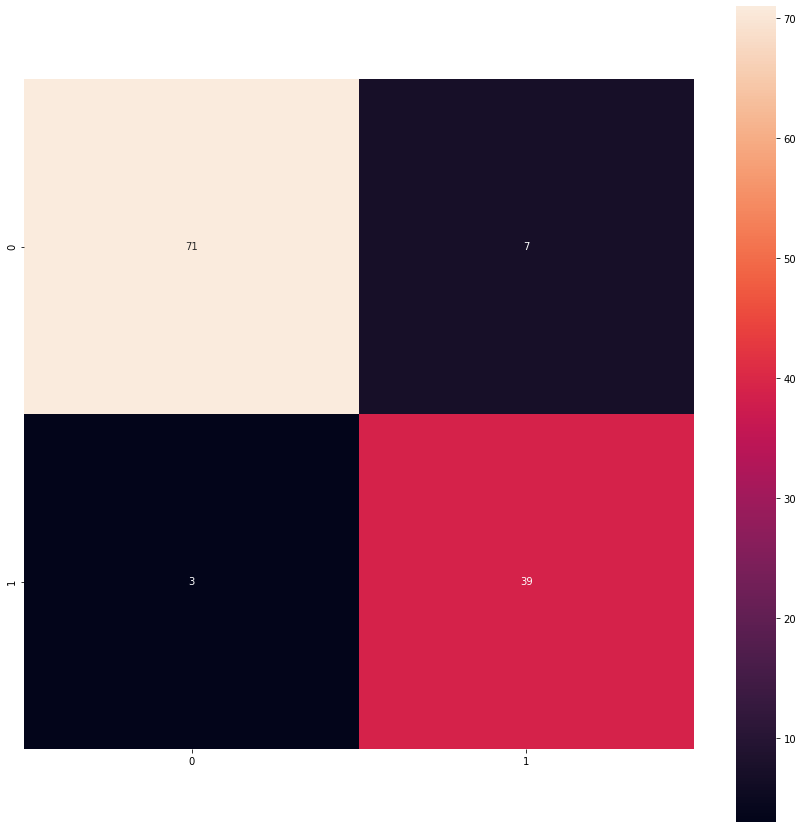

In [254]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, mlp.predict(X_test_norm))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("mlp4_matrix.jpg")
plt.show()

## e) Decision Tree

In [255]:
# Splitting dataset in 2 subsets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [256]:
# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15),'min_samples_leaf': np.arange(1,50)}

# Creamos un árbol de clasificación
dtree_model=tree.DecisionTreeClassifier()

# Usamos gridsearch para evluar los parámetros
dtree_model = GridSearchCV(dtree_model, param_grid, n_jobs=-1, cv=3)

# 
dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1}


In [257]:
dtree_model4_acc = accuracy_score(Y_test, dtree_model.predict(X_test))

print(f"Training Accuracy of Decision Tree is {accuracy_score(Y_train, dtree_model.predict(X_train))}")
print(f"Test Accuracy of Decision Tree is {dtree_model4_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, dtree_model.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, dtree_model.predict(X_test))}") 

Training Accuracy of Decision Tree is 0.9964285714285714
Test Accuracy of Decision Tree is 0.9333333333333333 

Confusion Matrix :- 
[[73  5]
 [ 3 39]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        78
           1       0.89      0.93      0.91        42

    accuracy                           0.93       120
   macro avg       0.92      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



[[73  5]
 [ 3 39]]


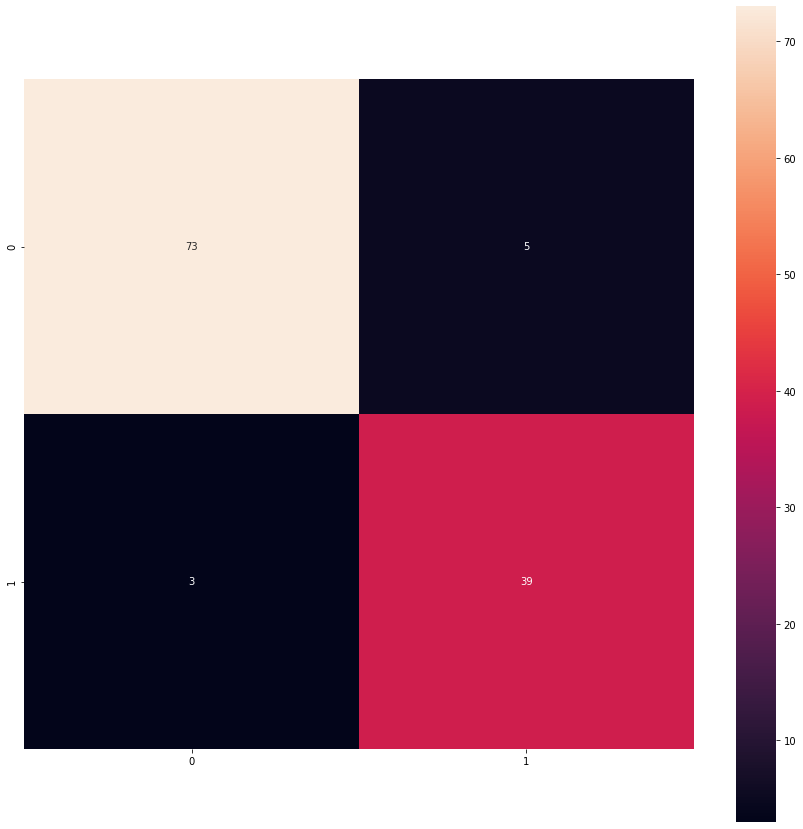

In [258]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, dtree_model.predict(X_test))
print(matrix)

plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.savefig("dtree4_matrix.jpg")
plt.show()

# 5. Models Comparison

In [259]:
models = pd.DataFrame({
    'Model' : [ 'KNN with all original variables','KNN with a univariate filter feature subset selection',
               'KNN with a multivariate filter feature subset selection', 'KNN with a multivariate wrapper feature subset selection',
               'Rule Induction with all original variables','Rule Induction with a univariate filter feature subset selection',
               'Rule Induction with a multivariate filter feature subset selection', 'Rule Induction with a multivariate wrapper feature subset selection',
               'SVM with all original variables','SVM with a univariate filter feature subset selection',
               'SVM with a multivariate filter feature subset selection', 'SVM with a multivariate wrapper feature subset selection',
               'MLP with all original variables','MLP with a univariate filter feature subset selection',
               'MLP with a multivariate filter feature subset selection', 'MLP with a multivariate wrapper feature subset selection',
               'Decision Tree with all original variables','Decision Tree with a univariate filter feature subset selection',
               'Decision Tree with a multivariate filter feature subset selection', 'Decision Tree with a multivariate wrapper feature subset selection'],
    'Score' : [knn_acc, knn2_acc, knn3_acc, knn4_acc, ri_acc, ri2_acc, ri3_acc, ri4_acc, svm_acc, svm2_acc, svm3_acc, svm4_acc,
              mlp_acc, mlp2_acc, mlp3_acc, mlp4_acc, dtree_model_acc, dtree_model2_acc, dtree_model3_acc, dtree_model4_acc]
})


models.sort_values(by = 'Score', ascending = False)



,Model,Score
12,MLP with all original variables,0.983333
8,SVM with all original variables,0.983333
9,SVM with a univariate filter feature subset se...,0.966667
17,Decision Tree with a univariate filter feature...,0.966667
16,Decision Tree with all original variables,0.966667
0,KNN with all original variables,0.950000
3,KNN with a multivariate wrapper feature subset...,0.950000
13,MLP with a univariate filter feature subset se...,0.950000
1,KNN with a univariate filter feature subset se...,0.941667
19,Decision Tree with a multivariate wrapper feat...,0.933333


In [137]:
models.to_csv('models.csv',index=False)

In [130]:
import plotly
import plotly.express as px
fig = px.bar(data_frame = models.sort_values(by = 'Score', ascending = True), x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')
plotly.offline.plot(fig, filename='models_comparison.html')


'models_comparison.html'